# Data4Good Case Challenge



![Data4Good](Data4Good.png)



## 📖 Background
Artificial Intelligence (AI) is rapidly transforming education by providing students with instant access to information and adaptive learning tools. Still, it also introduces significant risks, such as the spread of misinformation and fabricated content. Research indicates that large language models (LLMs) often confidently generate factually incorrect or “hallucinated” responses, which can mislead learners and erode trust in digital learning platforms. 

The 4th Annual Data4Good Competition challenges participants to develop innovative analytics solutions to detect and improve factuality in AI-generated educational content, ensuring that AI advances knowledge rather than confusion.

### Previewing the Training Data

Let's load and preview the `train.json` dataset to understand its structure and contents.

In [1]:
import pandas as pd
import json

# Load the train.json file
data_path = "data/train.json"
with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
train_df = pd.DataFrame(data)

# Show the first 50 rows
train_df.head(50)

,answer,type,context,question
0,"In 1512, Parliament passed a significant act t...",factual,During the Hundred Years' War a French attack ...,In what year did Parliament pass a notable law...
1,The Spanish and French were the ones who estab...,factual,"""By May 1539, Conquistador Hernando de Soto sk...",Who established early settlements in Florida
2,"Traditionally, monsoons in Punjab are expected...",factual,The onset of the southwest monsoon is anticipa...,When do monsoons traditionally happen in Punjab?
3,The media made the requests for Kondo to use o...,factual,Media requests at the trade show prompted Kond...,Who made the requests for Kondo to use orchest...
4,According to historians Robert Friedel and Pau...,factual,In addressing the question of who invented the...,How many inventors came up with electric lamps...
5,The process that can increase solar energy pot...,factual,,What is the process called that can increase s...
6,The main focus of the 5th season is the Digita...,factual,"After a three-year hiatus, a fifth Digimon ser...",What was the main focus of the 5th season?
7,The mean annual temperature in Hyderabad is 26...,factual,Hyderabad has a tropical wet and dry climate (...,What is the mean yearly temperature in Hyderab...
8,The issue of through traffic benefits can aris...,factual,Network effects are a large factor with electr...,Where can the issue of through traffic benefit...
9,Montini's office received nearly ten million i...,irrelevant,,Fireworks are discharged on New Year's Eve fro...


## **Notebook Structure**
- Executive Summary
- Exploratory Data Analysis
- Feature Construction & Baseline Modeling
- Transformer-Based Modeling
- Improving the Sentence Embedding Approach
- Performance Comparison
- Hyperparameter Tuning on MiniLM + XGBoost Experiment
- Fusing MiniLM & MPNet Encodings
- Feature Importance
- Error Analysis
- Final Training & Testing
- Generative AI (LLMs)
- Conclusion & Future Work

---
---
---

# **Executive Summary**
This project evaluated multiple modeling strategies for factuality classification, progressing from feature-based discriminative models to embedding-driven approaches and, ultimately, to generative AI ensembles. Early experiments leveraging TF-IDF, Cross-NLI, and sentence-embedding–based approaches (MiniLM and MPNet) combined with linear and tree-based classifiers established strong baselines. TF-IDF performed the weakest, achieving a macro-F1 score of 0.35, while Cross-NLI improved modestly to 0.45. In contrast, embedding-based models consistently delivered substantially stronger results, with macro-F1 scores reaching the low-to-mid 0.90s. However, these approaches consistently plateaued, particularly struggling with nuanced contradiction cases and minority class boundaries, despite extensive feature engineering, fusion, and hyperparameter tuning.

To overcome these limitations, we adopted a generative AI–based approach using an ensemble of large language models (Gemini Flash, Mistral, and Seed-Flash). This shift enabled deeper semantic reasoning and cross-sentence inference that could not be reliably captured by fixed embeddings and handcrafted features. The ensemble achieved a macro-F1 score of 0.9667, significantly outperforming all prior methods and demonstrating improved robustness, class balance, and generalization.

Recommendation: For competition deployment and real-world use cases requiring high semantic fidelity, we recommend adopting the generative ensemble as the primary solution. Embedding-based classifiers remain valuable as efficient baselines or fallback systems, but generative ensembles should be preferred when accuracy on complex reasoning tasks is critical. Future work should focus on cost-performance tradeoffs, prompt optimization, and lightweight distillation strategies to operationalize this approach at scale.

_**NB: CODE CELLS COMMENTED ARE CELLS THAT DONT NEED TO BE RERUN AS THEIR VALUES HAVE BEEN SAVED TO SAVE ON RUNNING TIME ON EACH ITERATION. FINAL OUTPUT REMAINS THE SAME WHEN THE NOTEBOOK IS EXECUTED.**_

# **EXPLORATORY DATA ANALYSIS (EDA)**

## **Dataset Columns**

Each observation consists of the following fields:

- **question**: The question or prompt being asked
- **context**: Supporting information relevant to the question
- **answer**: The AI-generated answer to be evaluated
- **type**: The target label indicating factuality
- **index**: Unique identifier for each example

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21021 entries, 0 to 21020
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   answer    21021 non-null  object
 1   type      21021 non-null  object
 2   context   21021 non-null  object
 3   question  21021 non-null  object
dtypes: object(4)
memory usage: 657.0+ KB


## **Target Variable Distribution**

In [3]:
train_df['type'].value_counts()

type
factual          17431
contradiction     1818
irrelevant        1772
Name: count, dtype: int64

In [4]:
train_df['type'].value_counts(normalize=True)

type
factual          0.829218
contradiction    0.086485
irrelevant       0.084297
Name: proportion, dtype: float64

The dataset is highly imbalanced:

- **Factual**: 82.92% (17,431 examples)
- **Contradiction**: 8.65% (1,818 examples)
- **Irrelevant**: 8.43% (1,772 examples)

This imbalance has important modeling implications. A naive classifier that always predicts "Factual" would achieve high accuracy but poor performance on the minority classes. Therefore, accuracy alone is not a sufficient evaluation metric. Metrics such as **macro-averaged F1 score** will be more informative, as they weight each class equally.

## **Missing Values & Data Quality**

In [5]:
train_df.isna().sum()

answer      0
type        0
context     0
question    0
dtype: int64

In [2]:
train_df.duplicated().sum()

np.int64(1)

In [3]:
print(len(train_df))
train_df = train_df.drop_duplicates()
print(len(train_df))

21021
21020


- No missing values were observed across any columns.
- One duplicate record was detected in the training data.

Given the negligible number of duplicates relative to dataset size, the duplicate record was removed to ensure data integrity.

## **Text Length Analysis**
This tells us whether truncation will be a problem later or not. 

In [4]:
train_df['question_len'] = train_df['question'].str.split().str.len()
train_df['context_len'] = train_df['context'].str.split().str.len()
train_df['answer_len'] = train_df['answer'].str.split().str.len()

train_df[['question_len', 'context_len', 'answer_len']].describe()

,question_len,context_len,answer_len
count,21020.000000,21020.000000,21020.000000
mean,10.072502,109.052331,14.325547
std,3.586715,57.752443,6.894139
min,2.000000,0.000000,1.000000
25%,8.000000,83.000000,10.000000
50%,10.000000,106.000000,13.000000
75%,12.000000,138.000000,18.000000
max,34.000000,653.000000,92.000000


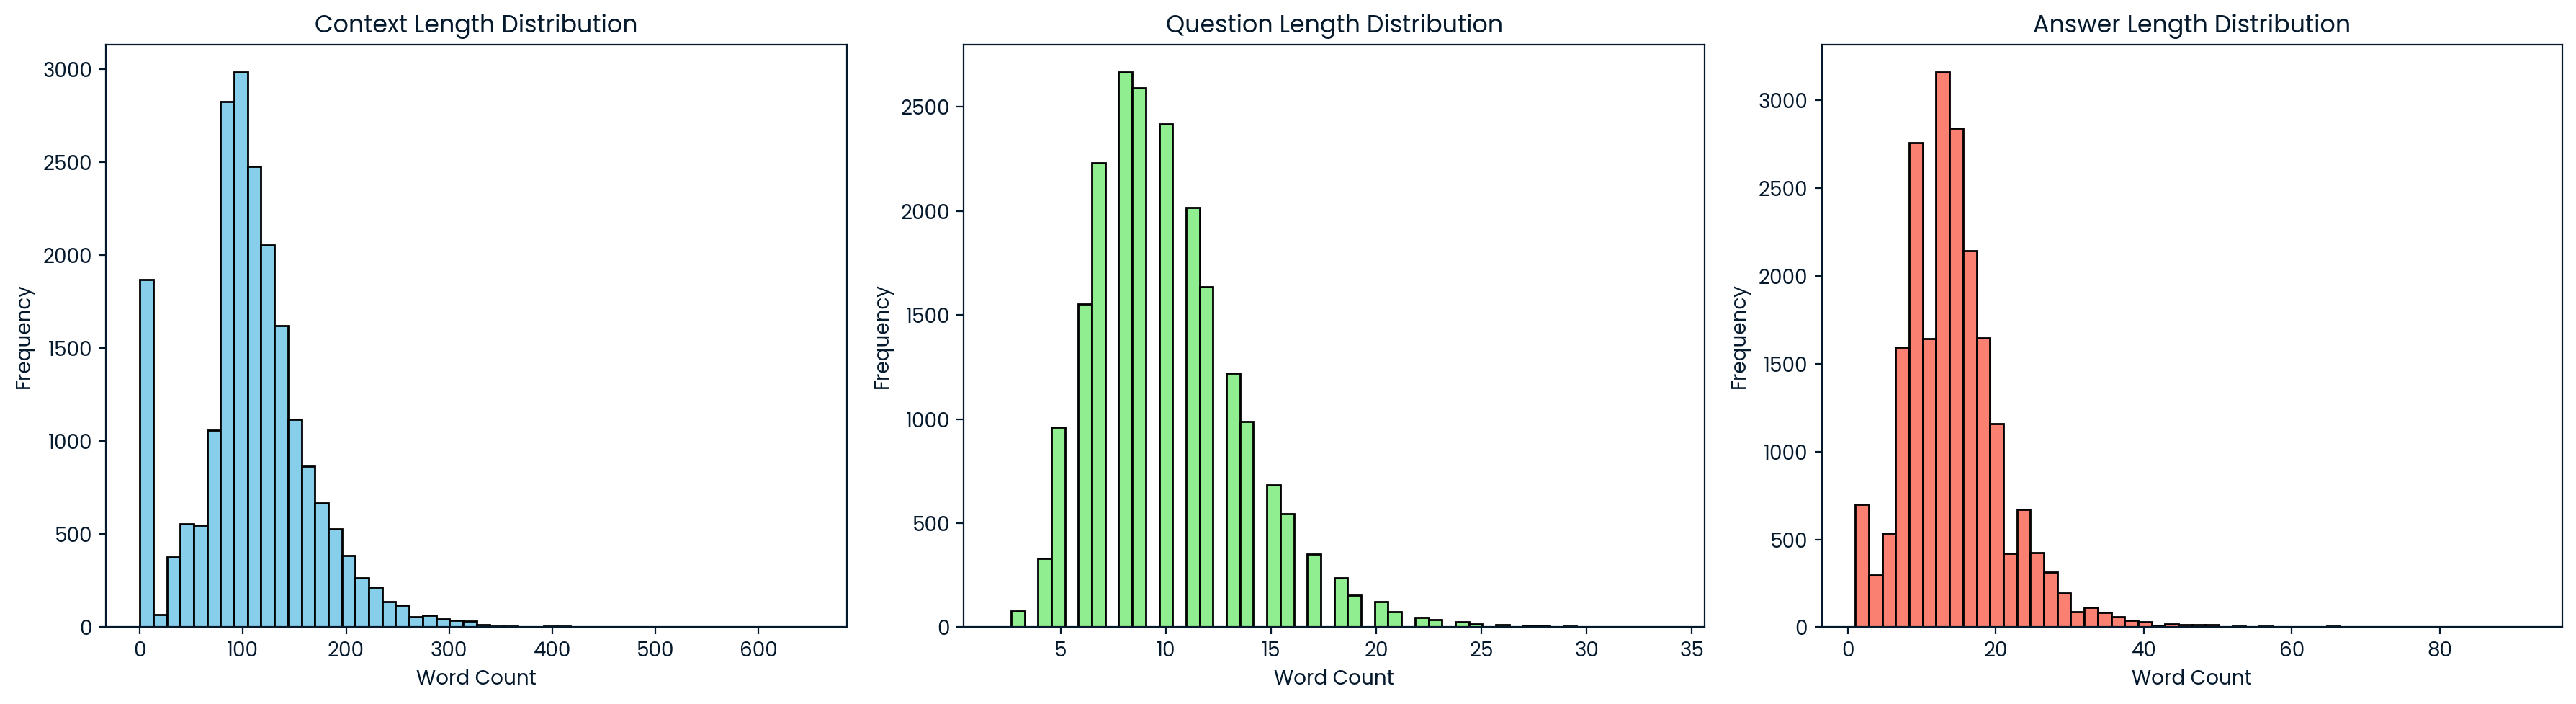

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(train_df['context_len'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title("Context Length Distribution")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")

axes[1].hist(train_df['question_len'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title("Question Length Distribution")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")

axes[2].hist(train_df['answer_len'], bins=50, color='salmon', edgecolor='black')
axes[2].set_title("Answer Length Distribution")
axes[2].set_xlabel("Word Count")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Average word counts across text fields are:

- **Question**: ~10 words
- **Context**: ~109 words
- **Answer**: ~14 words

The context field exhibits substantially higher variance, with a maximum length of 653 words. This is an important consideration for transformer-based models, which typically impose a maximum token limit (e.g., 512 tokens). While most examples fall well below this threshold, long-tail contexts may requiretruncation.

## **Class-wise Text Characteristics**

In [6]:
train_df.groupby('type')[['question_len', 'context_len', 'answer_len']].mean()

,question_len,context_len,answer_len
type,,,
contradiction,9.965347,108.101760,7.302530
factual,10.084624,109.168904,14.998279
irrelevant,10.063205,108.880926,14.913657


Average text lengths are largely consistent across classes for both the question and context fields. However, a notable difference appears in the answer length:

- **Contradiction** answers are significantly shorter on average (~7 words)
- **Factual** and **Irrelevant** answers average ~15 words

This suggests that contradiction answers may often be terse, incomplete, or contain brief negations, whereas factual and irrelevant answers tend to be more elaborated. While this pattern alone is insufficient for classification, it may provide weak lexical signals that baseline models can exploit.

## **Sample Inspection (Human Sanity Check)**

In [11]:
for label in train_df['type'].unique():
    print(f"\n--- Sample: {label} ---")
    sample = train_df[train_df['type']==label].iloc[5]
    print("Question:", sample['question'])
    print("Answer:", sample['answer'])


--- Sample: factual ---
Question: What is the process called that can increase solar energy in areas further away from the earth's equator?
Answer: The process that can increase solar energy potential in areas further from the Earth's equator is called photovoltaics.

--- Sample: irrelevant ---
Question: What position is the gymnast when in the air?
Answer: In the 1960s, the life expectancy in Egypt was 44.8 years.

--- Sample: contradiction ---
Question: When did the British Isles area become separated from the European continent?
Answer: The British Isles area became separated from the European continent around 8,000 years ago.


## **Key Takeaways from EDA**

- The task is **not separable by simple surface-level features** such as question or context length.
- The heavy class imbalance necessitates careful evaluation and potentially class-weighted loss functions.
- The semantic relationship between context, question, and answer is the primary signal, reinforcing the framing of this task as a **natural language inference problem**.

---
---
---

# **FEATURE CONSTRUCTION & BASELINE MODELING**

## **Modeling Strategy**
Before introducing complex neural models, we begin with a strong classical baseline. Establishing a baseline serves two purposes:

1. It provides a lower bound on expected performance.
2. It helps identify whether simple lexical signals are sufficient for this task.

Given the EDA findings, the task depends on the **semantic relationship** between the context, question, and answer. Therefore, we construct a single text input by concatenating these fields with explicit separators.

## **Input Representation**

Each example is represented as a single text sequence:

"Context: <context> Question: <question> Answer: <answer>"

Explicit prefixes are used to preserve the roles of each text component and to help models distinguish between supporting information, the question, and the candidate answer.

In [7]:
def buildInput(row):
    return (
        f"Context: {row['context']} "
        f"Question: {row['question']} "
        f"Answer: {row['answer']}"
    )

train_df['inputText'] = train_df.apply(buildInput, axis=1)

In [8]:
train_df['inputText'][0]

"Context: During the Hundred Years' War a French attack (1340) burned a manor house and took some prisoners, but failed to get into the town. In 1403 the town was burned by Breton raiders. In the late fifteenth century a 'castle quadrate' was constructed close to the area now known as The Barbican; it included four round towers, one at each corner, as featured on the city coat of arms. The castle served to protect Sutton Pool, which is where the fleet was based in Plymouth prior to the establishment of Plymouth Dockyard. In 1512 an Act of Parliament was passed for further fortifying Plymouth, and a series of fortifications were then built, including defensive walls at the entrance to Sutton Pool (across which a chain would be extended in time of danger). Defences on St Nicholas Island also date from this time, and a string of six artillery blockhouses were built, including one on Fishers Nose at the south-eastern corner of the Hoe. This location was further strengthened by the building

## **Target Encoding**

In [9]:
label_map = {
    'factual': 0, 
    'contradiction': 1, 
    'irrelevant': 2
}

train_df['label'] = train_df['type'].map(label_map)

In [10]:
train_df[['label', 'type']].tail()

,label,type
21016,0,factual
21017,0,factual
21018,2,irrelevant
21019,2,irrelevant
21020,0,factual


## **Train-Validation Split**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train_df['inputText'],
    train_df['label'],
    test_size=0.2,
    stratify=train_df['label'],
    random_state=42
)

## **Baseline Model Choice**
We use a TF-IDF representation with a multinomial Logistic Regression classifier. This model captures word- and phrase-level patterns and serves as a strong, interpretable baseline for text classification tasks. Class weights are applied to mitigate the strong class imbalance observed during EDA.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 

baseline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=50_000,
        ngram_range=(1,2),
        stop_words='english'
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

baseline.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = baseline.predict(X_val)

print(classification_report(y_val, y_pred, target_names=label_map.keys()))

               precision    recall  f1-score   support

      factual       0.84      0.75      0.79      3486
contradiction       0.11      0.16      0.13       364
   irrelevant       0.11      0.19      0.14       354

     accuracy                           0.65      4204
    macro avg       0.35      0.36      0.35      4204
 weighted avg       0.72      0.65      0.68      4204



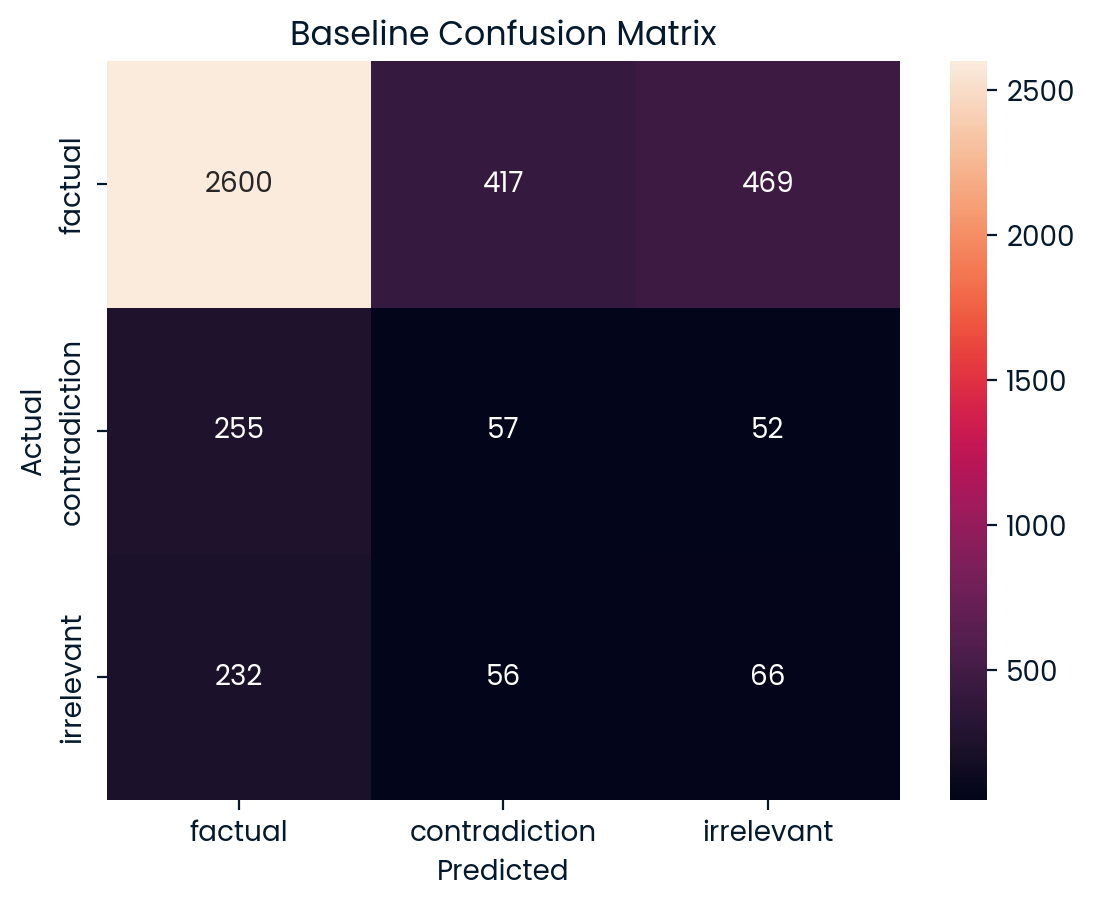

In [19]:
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)

sns.heatmap(
    cm, 
    annot=True, 
    fmt='d',
    xticklabels=label_map.keys(),
    yticklabels=label_map.keys()
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Baseline Confusion Matrix")
plt.show()

## **Baseline Model Results**
The TF-IDF + Logistic Regression baseline achieved the following performance on the validation set: 
- **Overall Accuracy**: 65%
- **Macro F1 Score**: 0.35

Class-level performance highlights substantial differences between the majority and minority classes. The model performs reasonably well on the Factual class (0.84 precision, 0.75 recall, 0.79 f1-score). This is expected given that factual answers often exhibit strong lexical overlap with both the question and the supporting context. Despite class weighting, the model struggles to correctly identify minority classes as it lacks the ability to model semantic navigation, logical inconsistency, and answer relevance beyond lexical overlap. As seen from our EDA, contradictions often share significant vocabulary with factual answers, differing only in a small number of semantically critical tokens (.e.g. 'east' vs 'west', 'increased' vs 'decreased'). TF-IDF assigns high weights to shared terms, which can overpower the signal from these subtle differences. 

## **Motivation from Transformer-Based Models**
The observed failure modes of the TF-IDF baseline motivates the use of transformer-based language models. Unlike bag-of-words approaches, transformers can model contextual word meaning, capture semantic negation, and reason over relationships between the context, question and answer. In the next step, we explore transformer-based models to address these limitations and improver performance on the minority classes.

---
---
---

# **TRANSFORMER-BASED MODELING**


## **DistilRoBERTa**
Given computational constraints, we select **DistilRoBERTa** as the transformer model. DistilRoBERTa is a distilled version of RoBERTa that
retains much of its semantic capability while significantly reducing memory and compute requirements, making it suitable for CPU-based training.

In [22]:
import warnings 
warnings.filterwarnings("ignore")

In [23]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model_name = "distilroberta-base"
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# model = AutoModelForSequenceClassification.from_pretrained(
#     model_name,
#     num_labels=3
# )

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
def tokenize(batch):
    return tokenizer(
        batch['inputText'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

## **Dataset Preparation**
We convert the pandas dataframe into HuggingFace `Dataset` objects to enable efficient batching, tokenization, and training. 

In [25]:
from datasets import Dataset

# train_dataset = Dataset.from_pandas(
#     train_df.loc[X_train.index, ['inputText', 'label']]
# )

# val_dataset = Dataset.from_pandas(
#     train_df.loc[X_val.index, ['inputText', 'label']]
# )

# train_dataset = train_dataset.map(tokenize, batched=True)
# val_dataset = val_dataset.map(tokenize, batched=True)

# train_dataset.set_format('torch')
# val_dataset.set_format('torch')

Map:   0%|          | 0/16816 [00:00<?, ? examples/s]

Map:   0%|          | 0/4204 [00:00<?, ? examples/s]

## **Training Configuration**
We finetune the model using cross-entropy loss. To accommodate CPU-only training, we use a small batch size with gradient accumulation to simulate a larger effective batch size.

In [26]:
from transformers import TrainingArguments

# training_args = TrainingArguments(
#     output_dir="./results",
#     learning_rate=2e-5,
#     per_device_train_batch_size=2,
#     per_device_eval_batch_size=2,
#     gradient_accumulation_steps=4,
#     num_train_epochs=2,
#     weight_decay=0.01,
#     logging_steps=200,
#     report_to="none"
# )

In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'macro_f1': f1_score(labels, preds, average='macro')
    }

In [ ]:
# from transformers import Trainer 

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     compute_metrics=compute_metrics
# )

# trainer.train()

Step,Training Loss


In [ ]:
# eval_results = trainer.evaluate()
# print(eval_results)

## **Evaluation on Test Data**

In [ ]:
# import json
# from datasets import Dataset

# with open("data/test.json", "r") as f:
#     test_data = json.load(f)

# test_dataset = Dataset.from_list(test_data)

# def build_input(example):
#     example["input_text"] = (
#         f"Context: {example['context']} "
#         f"Question: {example['question']} "
#         f"Answer: {example['answer']}"
#     )
#     return example

# test_dataset = test_dataset.map(build_input)

# test_dataset = test_dataset.map(tokenize, batched=True)
# test_dataset.set_format("torch")

# predictions = trainer.predict(test_dataset)

# predicted_labels = np.argmax(predictions.predictions, axis=1)

# label_map = {
#     0: "factual",
#     1: "contradiction",
#     2: "irrelevant"
# }

# predicted_types = [label_map[label] for label in predicted_labels]

# submission = []

# for example, pred_type in zip(test_dataset, predicted_types):
#     submission.append({
#         "id": example["id"],
#         "type": pred_type
#     })

# with open("test_predictions.json", "w") as f:
#     json.dump(submission, f, indent=2)

### **Notes on DistilRoBERTa**
The code section on DistilRoBERTa is entirely commented out as there is not enough computational resource to train the model for this task. The learning point here is that we have to prioritize simpler models that are easier to train on limited computing power and still provide reliable result. 

## **ALTERNATIVE: SENTENCE EMBEDDINGS**

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### **Semantic Pairs**
We compute embeddings for:
- Context
- Answer
- Question

In [13]:
context_emb = model.encode(train_df['context'].tolist(), show_progress_bar=True)
answer_emb = model.encode(train_df['answer'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/657 [00:00<?, ?it/s]

Batches:   0%|          | 0/657 [00:00<?, ?it/s]

### **Creating Meaningful Features**
Instead of raw text; we create semantic signals. 
**Key Features:**
- Cosine Similarity (context↔answer)
- Answer Length
- Context Length
- Keyword Overlap (answer ∩ context)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_sim = np.array([
    cosine_similarity([a], [c])[0][0] 
    for a, c in zip(answer_emb, context_emb)
]).reshape(-1,1)

### **Lightweight Classifer (Logistic Regression)**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X = np.hstack([
    cos_sim, 
    train_df['answer'].str.len().values.reshape(-1,1)
])

y = train_df['type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


               precision    recall  f1-score   support

contradiction       0.40      0.69      0.51       364
      factual       0.97      0.82      0.89      3486
   irrelevant       0.52      0.94      0.67       354

     accuracy                           0.82      4204
    macro avg       0.63      0.82      0.69      4204
 weighted avg       0.88      0.82      0.83      4204



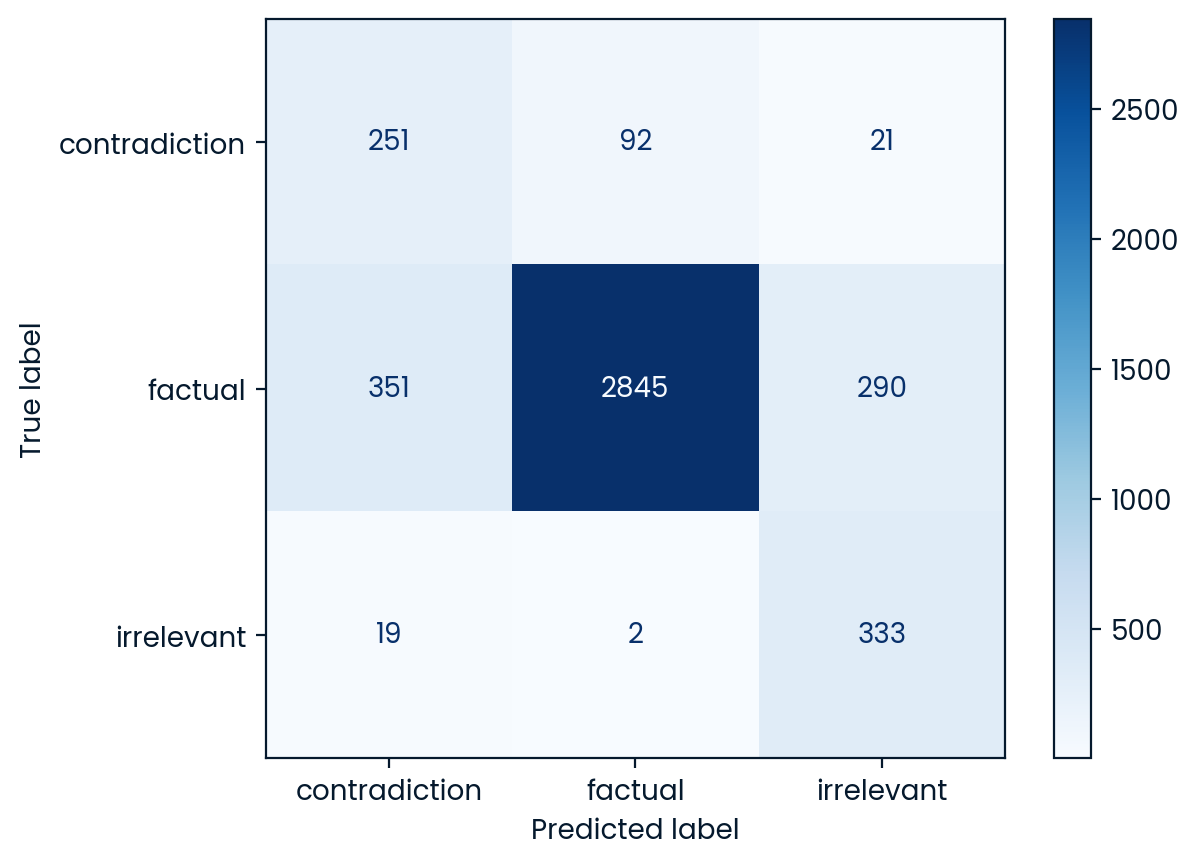

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on validation set
y_pred = clf.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=clf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='d')

# Optionally, show classification report for more details
print(classification_report(y_val, y_pred, target_names=clf.classes_))

### **Improvement: Lexical Polarity/Negation Signal**
Contradictions often include: 
- negation words
- antonyms
- numeric mismatches
Hence, simple and effective feature could be the negation overlap between answer and context. 

In [17]:
NEGATIONS = {"not", "no", "never", "none", "false", "incorrect", "cannot", "n't"}

def negation_count(text):
    tokens = text.lower().split()
    return sum(t in NEGATIONS for t in tokens)

In [18]:
neg_feat = (
    train_df['answer'].apply(negation_count) - 
    train_df['context'].apply(negation_count)
).values.reshape(-1,1)

### **Numeric Mismatch**

In [22]:
import re

def extract_numbers(text):
    return set(re.findall(r"\d+", text))

def numeric_mismatch(row):
    return int(
        len(extract_numbers(row["answer"]) - extract_numbers(row["context"])) > 0
    )

num_feat = train_df.apply(numeric_mismatch, axis=1).values.reshape(-1,1)

### **Final Feature Matrix**

In [25]:
X = np.hstack([
    cos_sim,
    neg_feat,
    num_feat,
    train_df["answer"].str.len().values.reshape(-1,1)
])

In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


               precision    recall  f1-score   support

contradiction       0.41      0.70      0.52       364
      factual       0.97      0.82      0.89      3486
   irrelevant       0.52      0.94      0.67       354

     accuracy                           0.82      4204
    macro avg       0.63      0.82      0.69      4204
 weighted avg       0.88      0.82      0.84      4204



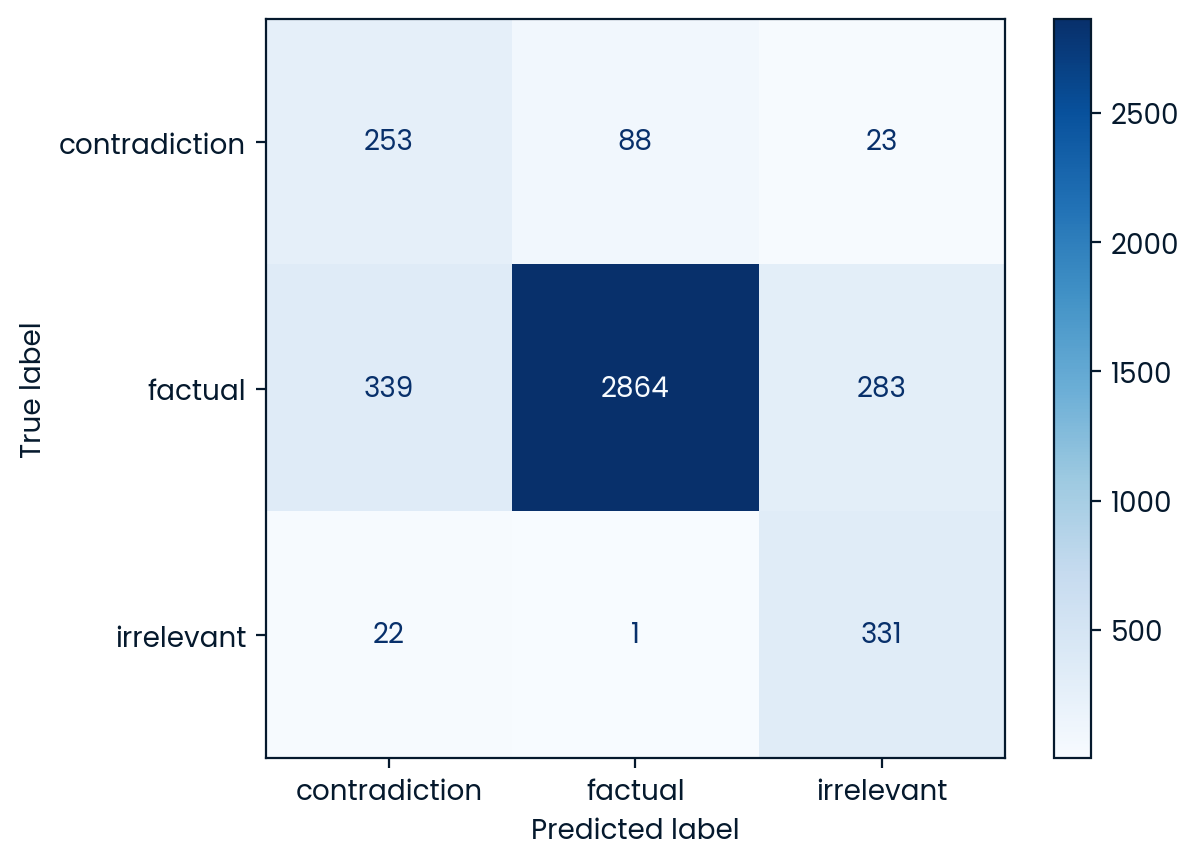

In [27]:
# Predict on validation set
y_pred = clf.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=clf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='d')

# Optionally, show classification report for more details
print(classification_report(y_val, y_pred, target_names=clf.classes_))

### **Generate Predictions on Test Set**

In [28]:
import json 
import pandas as pd

In [29]:
with open("data/test.json", "r") as f:
    test_data = json.load(f)

test_df = pd.DataFrame(test_data)

In [30]:
context_emb_test = model.encode(
    test_df["context"].tolist(),
    show_progress_bar=True
)

answer_emb_test = model.encode(
    test_df["answer"].tolist(),
    show_progress_bar=True
)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [36]:
cos_sim_test = np.array([
    cosine_similarity([a], [c])[0][0]
    for a, c in zip(answer_emb_test, context_emb_test)
]).reshape(-1, 1)

neg_feat_test = (
    test_df["answer"].apply(negation_count) -
    test_df["context"].apply(negation_count)
).values.reshape(-1, 1)

num_feat_test = test_df.apply(numeric_mismatch, axis=1).values.reshape(-1, 1)

len_feat_test = test_df["answer"].str.len().values.reshape(-1, 1)

X_test = np.hstack([
    cos_sim_test,
    neg_feat_test,
    num_feat_test,
    len_feat_test
])

test_df['type'] = clf.predict(X_test)

with open("test_predictions.json", "w") as f:
    json.dump(test_df.to_dict(orient='records'), f, indent=2)

print(len(submission))
print(test_df.type.value_counts())

2000
type
factual          1408
irrelevant        342
contradiction     250
Name: count, dtype: int64


## **CROSS-ENCODER NLI**

In [38]:
from sentence_transformers import CrossEncoder

model = CrossEncoder(
    "cross-encoder/nli-deberta-v3-small",
    device="cpu"
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/568M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

### **Prepare Input Pairs**
We treat: 
- Premise = context
- Hypothesis = answer

In [43]:
val_df = train_df.sample(
    frac=0.2,
    random_state=42
)

pairs = list(zip(
    val_df['context'].tolist(),
    val_df['answer'].tolist()
))

In [45]:
nli_preds = model.predict(
    pairs,
    batch_size=8,
    show_progress_bar=True
)

Batches:   0%|          | 0/526 [00:00<?, ?it/s]

In [46]:
nli_to_label = {
    0: 'contradiction',
    1: 'factual',
    2: 'irrelevant'
}

pred_labels = [
    nli_to_label[np.argmax(p)]
    for p in nli_preds
]

In [47]:
print(classification_report(
    val_df['type'],
    pred_labels,
    digits=4
))

               precision    recall  f1-score   support

contradiction     0.3700    0.4927    0.4226       341
      factual     0.9962    0.5279    0.6901      3499
   irrelevant     0.1551    0.8077    0.2602       364

     accuracy                         0.5492      4204
    macro avg     0.5071    0.6094    0.4576      4204
 weighted avg     0.8726    0.5492    0.6312      4204



### **Evaluation on Test Set**

In [51]:
with open("data/test.json", "r") as f:
    test_data = json.load(f)

test_df = pd.DataFrame(test_data)

pairs = list(zip(
    test_df["context"].tolist(),
    test_df["answer"].tolist()
))

import numpy as np

nli_preds = model.predict(
    pairs,
    batch_size=8,         
    show_progress_bar=True
)

nli_to_label = {
    0: "contradiction",
    1: "factual",
    2: "irrelevant"
}

test_df["type"] = [
    nli_to_label[np.argmax(p)]
    for p in nli_preds
]

with open("test_predictions_cross_encoder.json", "w") as f:
    json.dump(
        test_df.to_dict(orient="records"),
        f,
        indent=2
    )

Batches:   0%|          | 0/250 [00:00<?, ?it/s]

In [52]:
print(len(test_df))
print(test_df['type'].value_counts())

2000
type
irrelevant       913
factual          824
contradiction    263
Name: count, dtype: int64


---
---
---

# **Performance Comparison So Far...**

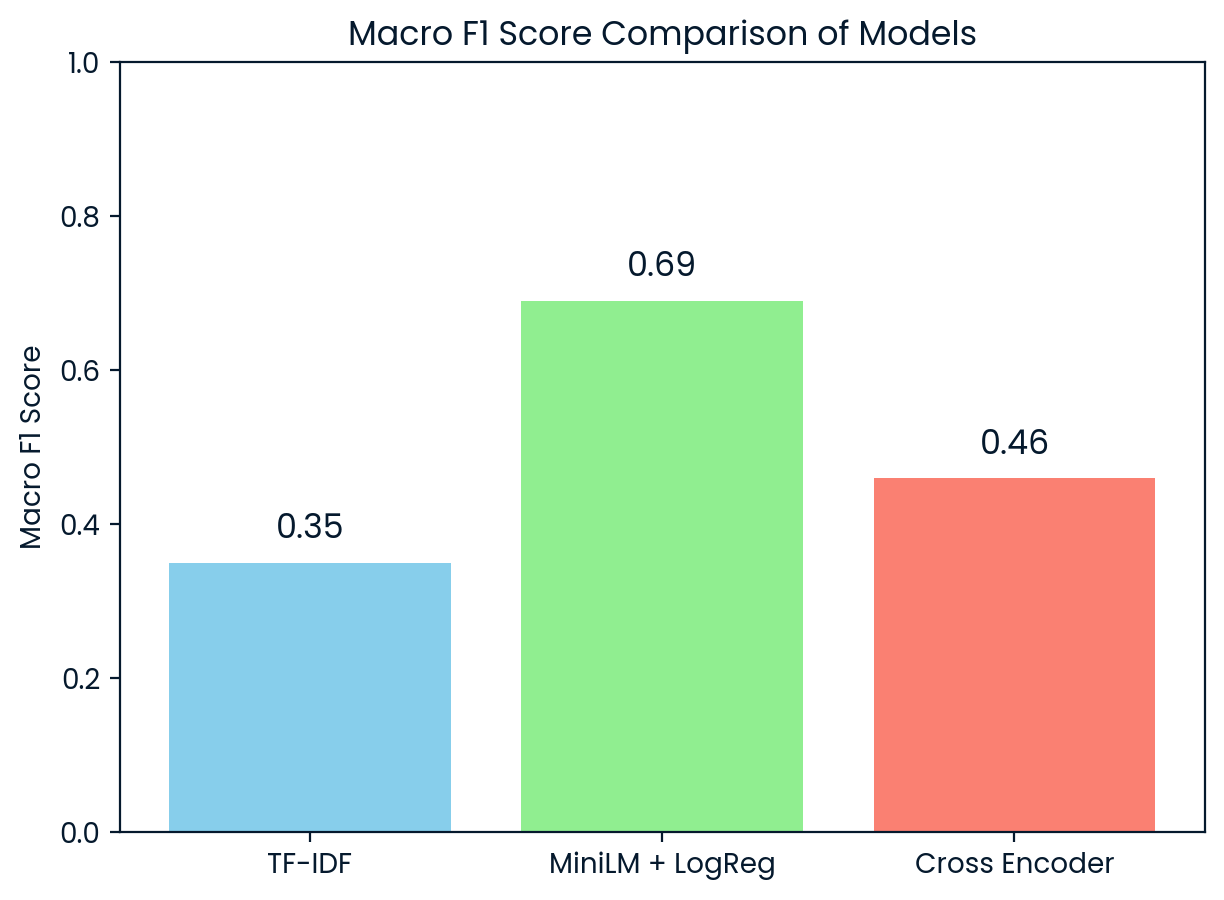

In [1]:
import matplotlib.pyplot as plt

tfidf = 0.35
minilmLog = 0.69
crossEnc = 0.46

models = ['TF-IDF', 'MiniLM + LogReg', 'Cross Encoder']
scores = [tfidf, minilmLog, crossEnc]

plt.figure(figsize=(7, 5))
bars = plt.bar(models, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score Comparison of Models')

# Annotate bars with score values
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{score:.2f}", 
             ha='center', va='bottom', fontsize=12)

plt.show()

---
---
---

# **Improving the Sentence Embedding Approach**
Given our understanding from the previous experiments, we infer that sentence embeddings would work better compared to Cross-Encoder based architecture for this task, bearing the dataset we have. Hence, we try to improve the approach by engineering more features, combining pretrained sentence embeddings with lightweight classifiers. 

Four model configurations were explored to systematically evaluate two dimensions: 
1. Embedding Quality: MiniLM vs MPNet
2. Classifier Capacity: Linear (Logistic Regression) vs Non-Linear (XGBoost)

This resulted in 4 experiments:
- MiniLM + Logistic
- MiniLM + XGBoost
- MPNet + Logistic
- MPNet + XGBoost

Each experiment was evaluated on a fixed stratified validation set using macro-averaged F1 score, given the strong class imbalance in the dataset.

In [3]:
import json
import pandas as pd
with open("data/train.json", "r") as f:
    train_data = json.load(f)

train_df = pd.DataFrame(train_data)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [2]:
# miniLM_model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# mpnet = SentenceTransformer('all-mpnet-base-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
# train_df["ans_emb_minilm"] = list(miniLM_model.encode(train_df["answer"].tolist()))
# train_df["ctx_emb_minilm"] = list(miniLM_model.encode(train_df["context"].tolist()))
# train_df["q_emb_minilm"] = list(miniLM_model.encode(train_df["question"].tolist()))

In [12]:
# train_df["ans_emb_mpnet"] = list(mpnet.encode(train_df["answer"].tolist()))
# train_df["ctx_emb_mpnet"] = list(mpnet.encode(train_df["context"].tolist()))
# train_df["q_emb_mpnet"] = list(mpnet.encode(train_df["question"].tolist()))

In [7]:
import pickle

# with open("train_with_embeddings.pkl", "wb") as f:
#     pickle.dump(train_df, f)

In [9]:
import pickle

with open("train_with_embeddings.pkl", "rb") as f:
    train_df = pickle.load(f)

## **Helper Functions**

In [10]:
# Answer Length
def answer_length(text):
    return len(text.split())

# Negation Counting
NEGATIONS = {
    'not', 'no', 'never', 'none', 'neither', 'nobody', 'nothing', 
    'nowhere', 'cannot', "can't", "won't", "don't", "doesn't", 
    "didn't", "isn't", "aren't", "wasn't", "weren't", "n't",
    'false', 'incorrect', 'wrong', 'untrue', 'rather', 'instead'
}
def count_negations(text):
    if pd.isna(text):
        return 0
    words = text.lower().split()
    return sum(1 for w in words if any(neg in w for neg in NEGATIONS))

# Number Extraction
def extract_numbers(text):
    if pd.isna(text):
        return set()
    return set(re.findall(r'\b\d+\b', str(text)))

def number_mismatch(row):
    ans_nums = extract_numbers(row['answer'])
    ctx_nums = extract_numbers(row['context'])
    if len(ans_nums) == 0:
        return 0
    return int(len(ans_nums - ctx_nums) > 0)

# Token Overlap (Jaccard)
def token_overlap(a, b):
    a_tokens = set(a.lower().split())
    b_tokens = set(b.lower().split())
    if not a_tokens or not b_tokens:
        return 0.0
    return len(a_tokens & b_tokens) / len(a_tokens)

# Semantic Similarity Helpers
def cosine_from_columns(df, col_a, col_b):
    return np.array([
        cosine_similarity([a], [b])[0][0]
        for a, b in zip(df[col_a], df[col_b])
    ])

In [11]:
from sklearn.metrics import classification_report, f1_score

def evaluateModel(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    class_report = classification_report(y_val, preds, digits=4)
    fone_score = f1_score(y_val, preds, average='macro')

    print(class_report)
    print(fone_score)

    return class_report, fone_score

## **Feature Builder**
The engineered features listed—such as `answer_length`, `answer_negations`, `negation_diff`, `number_mismatch`, `answer_context_overlap`, `answer_question_overlap`, `semantic_answer_context_similarity`, `semantic_answer_question_similarity`, and `semantic_question_context_similarity`—are designed to capture nuanced relationships between the answer, question, and context in a dataset. Features like `answer_length` and `answer_negations` provide basic linguistic cues, while `negation_diff` and `number_mismatch` help identify logical inconsistencies or mismatches that may signal incorrect answers. Overlap-based features (`answer_context_overlap`, `answer_question_overlap`) quantify the lexical similarity, which can be indicative of relevance or correctness. The semantic similarity features leverage deeper language understanding to measure how closely the answer aligns with the context and question at a conceptual level. By combining these surface-level and semantic features, the model is better equipped to distinguish between correct and incorrect answers, ultimately improving its predictive performance and robustness.

In [12]:
FEATURE_NAMES = [
    "answer_length",
    "answer_negations",
    "negation_diff",
    "number_mismatch",
    "answer_context_overlap",
    "answer_question_overlap",
    "semantic_answer_context_similarity",
    "semantic_answer_question_similarity",
    "semantic_question_context_similarity"
]

In [13]:
def buildFeatures(df, emb_prefix):
    data = {
        "answer_length": df["answer"].apply(answer_length).values,
        "answer_negations": df["answer"].apply(count_negations).values,
        "negation_diff": (
            df["answer"].apply(count_negations) -
            df["context"].apply(count_negations)
        ).values,
        "number_mismatch": df.apply(number_mismatch,axis=1).values,
        "answer_context_overlap": df.apply(
            lambda r: token_overlap(r["answer"], r["context"]),
            axis=1
        ).values,
        "answer_question_overlap": df.apply(
            lambda r: token_overlap(r["answer"], r["question"]),
            axis=1
        ).values,
        "semantic_answer_context_similarity": cosine_from_columns(
            df, f"ans_emb_{emb_prefix}", f"ctx_emb_{emb_prefix}"
        ),
        "semantic_answer_question_similarity": cosine_from_columns(
            df, f"ans_emb_{emb_prefix}", f"q_emb_{emb_prefix}"
        ),
        "semantic_question_context_similarity": cosine_from_columns(
            df, f"q_emb_{emb_prefix}", f"ctx_emb_{emb_prefix}"
        )
    }

    feature_df = pd.DataFrame(data)

    return feature_df

## **Train/Validation Split**

In [14]:
from sklearn.model_selection import train_test_split

train_split, val_split = train_test_split(
    train_df, 
    test_size=0.2,
    random_state=42,
    stratify=train_df['type']
)

train_split = train_split.reset_index(drop=True)
val_split = val_split.reset_index(drop=True)

## **MINILM + LOGISTIC REGRESSION**
This configuation serves as a strong and efficient new baseline. MiniLM provides compact sentence embeddings at low computational cost, while Logistic Regression offers interpretability and fast training. This setup helps assess how far a linear decision boundary can go when combined with carefully engineered semantic and lexical features. 

In [15]:
X_train_df = buildFeatures(train_split, emb_prefix='minilm')
X_val_df = buildFeatures(val_split, emb_prefix='minilm')
y_train = train_split['type'].values
y_val = val_split['type'].values

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_df), columns=FEATURE_NAMES)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_df), columns=FEATURE_NAMES)

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

cr1, fs1 = evaluateModel(
    lr, 
    X_train_scaled, y_train,
    X_val_scaled, y_val
)

               precision    recall  f1-score   support

contradiction     0.4844    0.7665    0.5936       364
      factual     0.9797    0.9114    0.9443      3487
   irrelevant     0.8987    0.9774    0.9364       354

     accuracy                         0.9044      4205
    macro avg     0.7876    0.8851    0.8248      4205
 weighted avg     0.9300    0.9044    0.9133      4205

0.8247683956576303


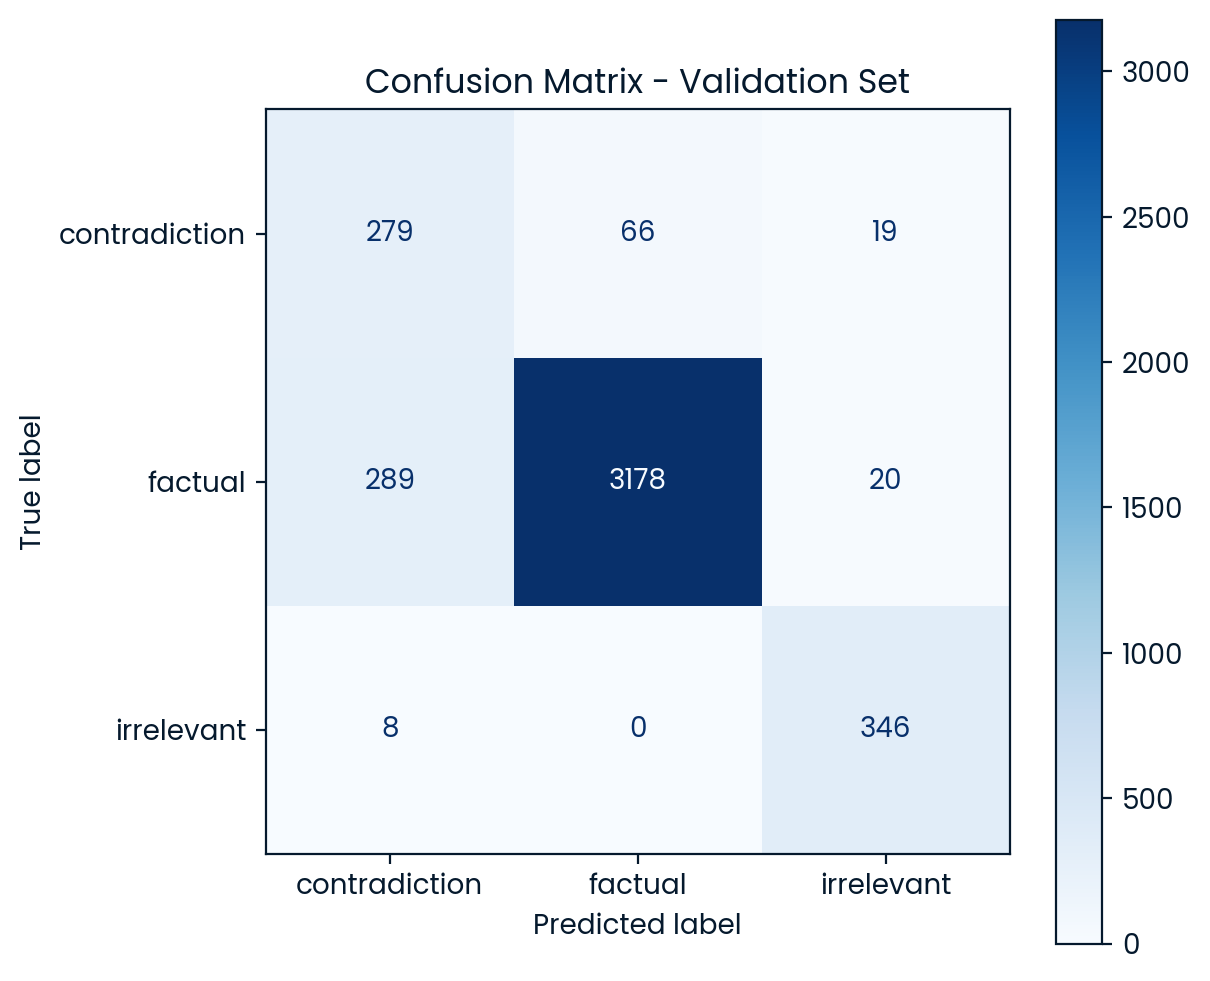

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Predict on validation set
y_val_pred = lr.predict(X_val_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred, labels=lr.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix - Validation Set")
plt.show()

### **Performance Insights**
- Macro F1: **0.8248**
- Accuracy: **0.9044**

**Key Observations:**
- Strong performance on factual and irrelevant classes (**F1=0.94**).
- Contradiction recall is relatively high (**0.77**), but precision is low (**0.48**), indicating over-prediction of contradcitions.
- The model captures semantic alignment well but struggles with non-linear interactions between features.
- The effectiveness of feature engineering is confirmed, but suggests that linear models may be insufficient for reliably separating contradictions. 

## **MINILM + XGBOOST**
Given the limitations observed with a linear classifier, XGBoost was introduced to model non-linear feature interactions. Gradient-boosted trees are well-suited for combining heterogeneous signals such as negation counts, numeric mismatches, and semantic similarity scores.

In [19]:
LABEL_MAP = {
    'factual': 0,
    'contradiction': 1,
    'irrelevant': 2
}

INV_LABEL_MAP = {v: k for k, v in LABEL_MAP.items()}

y_train_enc = pd.Series(y_train).map(LABEL_MAP).values
y_val_enc = pd.Series(y_val).map(LABEL_MAP).values

In [56]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42
)



cr2, fs2 = evaluateModel(
    xgb,
    X_train_df, y_train_enc,
    X_val_df,   y_val_enc
)

              precision    recall  f1-score   support

           0     0.9701    0.9943    0.9820      3487
           1     0.9167    0.6951    0.7906       364
           2     0.9887    0.9915    0.9901       354

    accuracy                         0.9681      4205
   macro avg     0.9585    0.8936    0.9209      4205
weighted avg     0.9670    0.9681    0.9661      4205

0.9209219394683856


In [22]:
# --- GENERATE PREDICTIONS FOR TEST SET ---

# test_df = pd.read_pickle('test_df_with_embeddings.pkl')
# X_test = buildFeatures(test_df, 'minilm')
# test_preds = xgb.predict(X_test)
# test_df['type'] = [INV_LABEL_MAP[p] for p in test_preds]

# print(test_df['type'].value_counts())

# final_test_df = test_df[['ID', 'answer', 'type', 'context', 'question']]
# final_test_df.head()

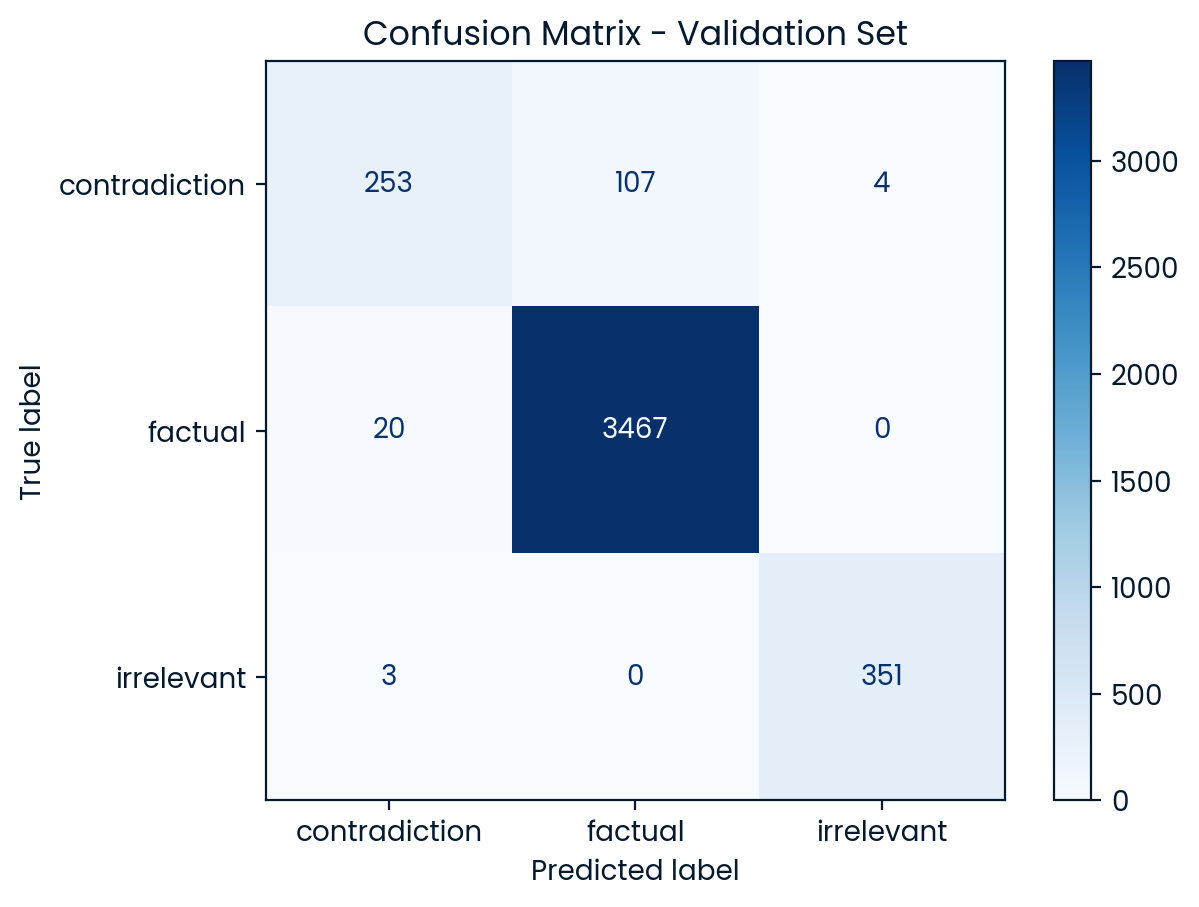

In [30]:
# Define the desired order of labels
ordered_labels = ['contradiction', 'factual', 'irrelevant']
ordered_indices = [LABEL_MAP[label] for label in ordered_labels]

# Predict on validation set
y_val_pred = xgb.predict(X_val_df)

# Compute confusion matrix with specified label order
cm = confusion_matrix(y_val_enc, y_val_pred, labels=ordered_indices)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)
disp.plot(cmap="Blues", values_format='d')
plt.title('Confusion Matrix - Validation Set')
plt.show()

### **Performance Insights**
- Macro F1: 0.9209
- Accuracy: 0.9681

**Key Observations:**
- Substantial improvement in macro F1 (+9.6 points over Logistic Regression).
- Near-perfect performance on factual and irrelevant classes.
- Contradiction precision increases dramatically (0.92), while recall remains reasonable (0.70).
- The large performance jump demonstrates that contradiction detection relies on non-linear combinations of features, which XGBoost captures effectively even with relatively simple embeddings.

## **MPNET + LOGISTIC REGRESSION**
MPNet embeddings are known to provide richer semantic representations than MiniLM. This experiment isolates the impact of higher-quality embeddings while keeping the classifier simple and interpretable.

In [25]:
X_train_mp = buildFeatures(train_split, 'mpnet')
X_val_mp = buildFeatures(val_split, 'mpnet')

X_train_mp_scaled = pd.DataFrame(scaler.fit_transform(X_train_mp), columns=FEATURE_NAMES)
X_val_mp_scaled = pd.DataFrame(scaler.transform(X_val_mp), columns=FEATURE_NAMES)

cr3, fs3 = evaluateModel(
    lr,
    X_train_mp_scaled, y_train,
    X_val_mp_scaled, y_val
)

               precision    recall  f1-score   support

contradiction     0.4667    0.7885    0.5863       364
      factual     0.9789    0.9028    0.9393      3487
   irrelevant     0.9278    0.9802    0.9533       354

     accuracy                         0.8994      4205
    macro avg     0.7911    0.8905    0.8263      4205
 weighted avg     0.9302    0.8994    0.9099      4205

0.8262967287096178


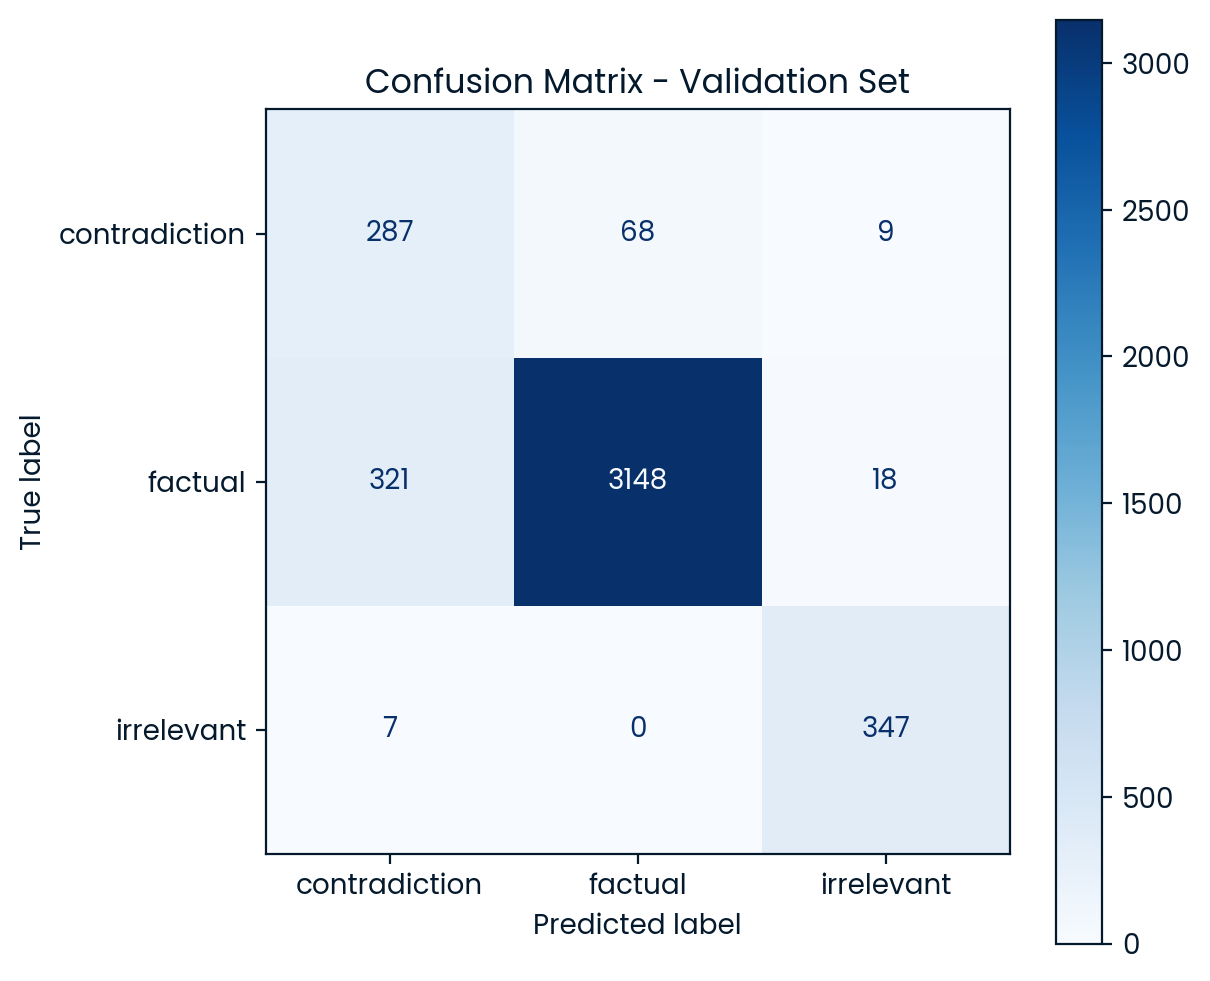

In [32]:
y_val_pred = lr.predict(X_val_mp_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred, labels=lr.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix - Validation Set")
plt.show()

### **Performance Insights**
- Macro F1: 0.8263
- Accuracy: 0.8994

**Key Observations:**
- Slight improvement over MiniLM + Logistic in macro F1.
- Similar behavior to the MiniLM baseline: strong on factual/irrelevant, weak precision on contradictions.
- Gains from better embeddings are limited by the linear nature of the classifier.
- Embedding quality alone is not sufficient; classifier expressiveness plays a larger role in overall performance.

## **MPNET + XGBOOST**
This configuration combines the strongest embedding model with the most expressive classifier. It represents the upper bound of performance achievable under the constraint of avoiding large-scale neural fine-tuning.

In [26]:
cr4, fs4 = evaluateModel(
    xgb,
    X_train_mp, y_train_enc,
    X_val_mp, y_val_enc
)

              precision    recall  f1-score   support

           0     0.9695    0.9946    0.9819      3487
           1     0.9194    0.6896    0.7881       364
           2     0.9887    0.9915    0.9901       354

    accuracy                         0.9679      4205
   macro avg     0.9592    0.8919    0.9200      4205
weighted avg     0.9668    0.9679    0.9658      4205

0.9200253226114817


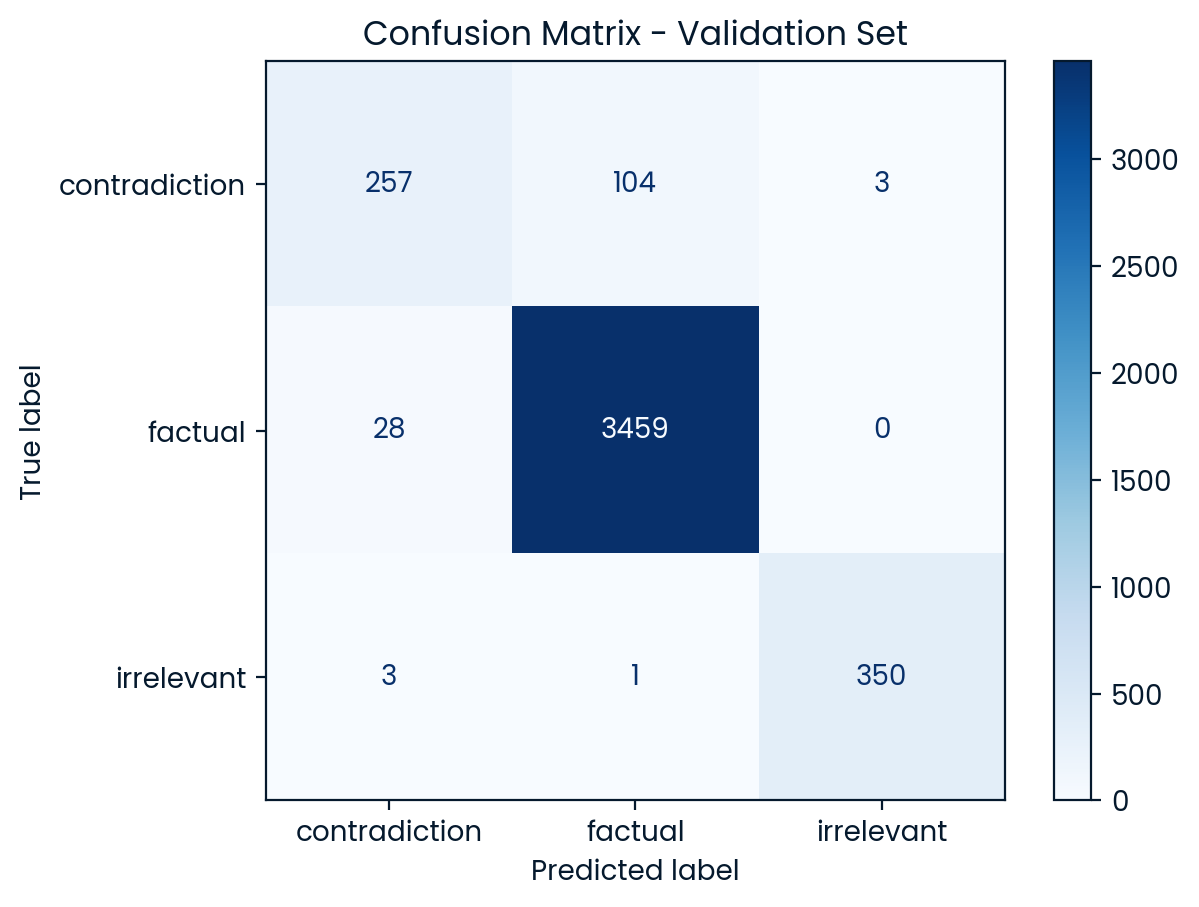

In [31]:
ordered_labels = ['contradiction', 'factual', 'irrelevant']
ordered_indices = [LABEL_MAP[label] for label in ordered_labels]

# Predict on validation set
y_val_pred = xgb.predict(X_val_mp)

# Compute confusion matrix with specified label order
cm = confusion_matrix(y_val_enc, y_val_pred, labels=ordered_indices)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)
disp.plot(cmap="Blues", values_format='d')
plt.title('Confusion Matrix - Validation Set')
plt.show()

### **Performance Insights**
- Macro F1: 0.9200
- Accuracy: 0.9679

**Key observations:**
- Performance is comparable to MiniLM + XGBoost.
- Slight improvements in some class-level metrics, but no significant macro-F1 gain.
- Suggests diminishing returns from higher-dimensional embeddings once non-linear feature interactions are modeled.
- Once paired with a powerful classifier, MiniLM embeddings are already sufficient for this task. MPNet does not provide a meaningful additional benefit relative to its higher computational cost.

---
---
---

# **PERFORMANCE COMPARISON [LAST 4 EXPERIMENTS]**

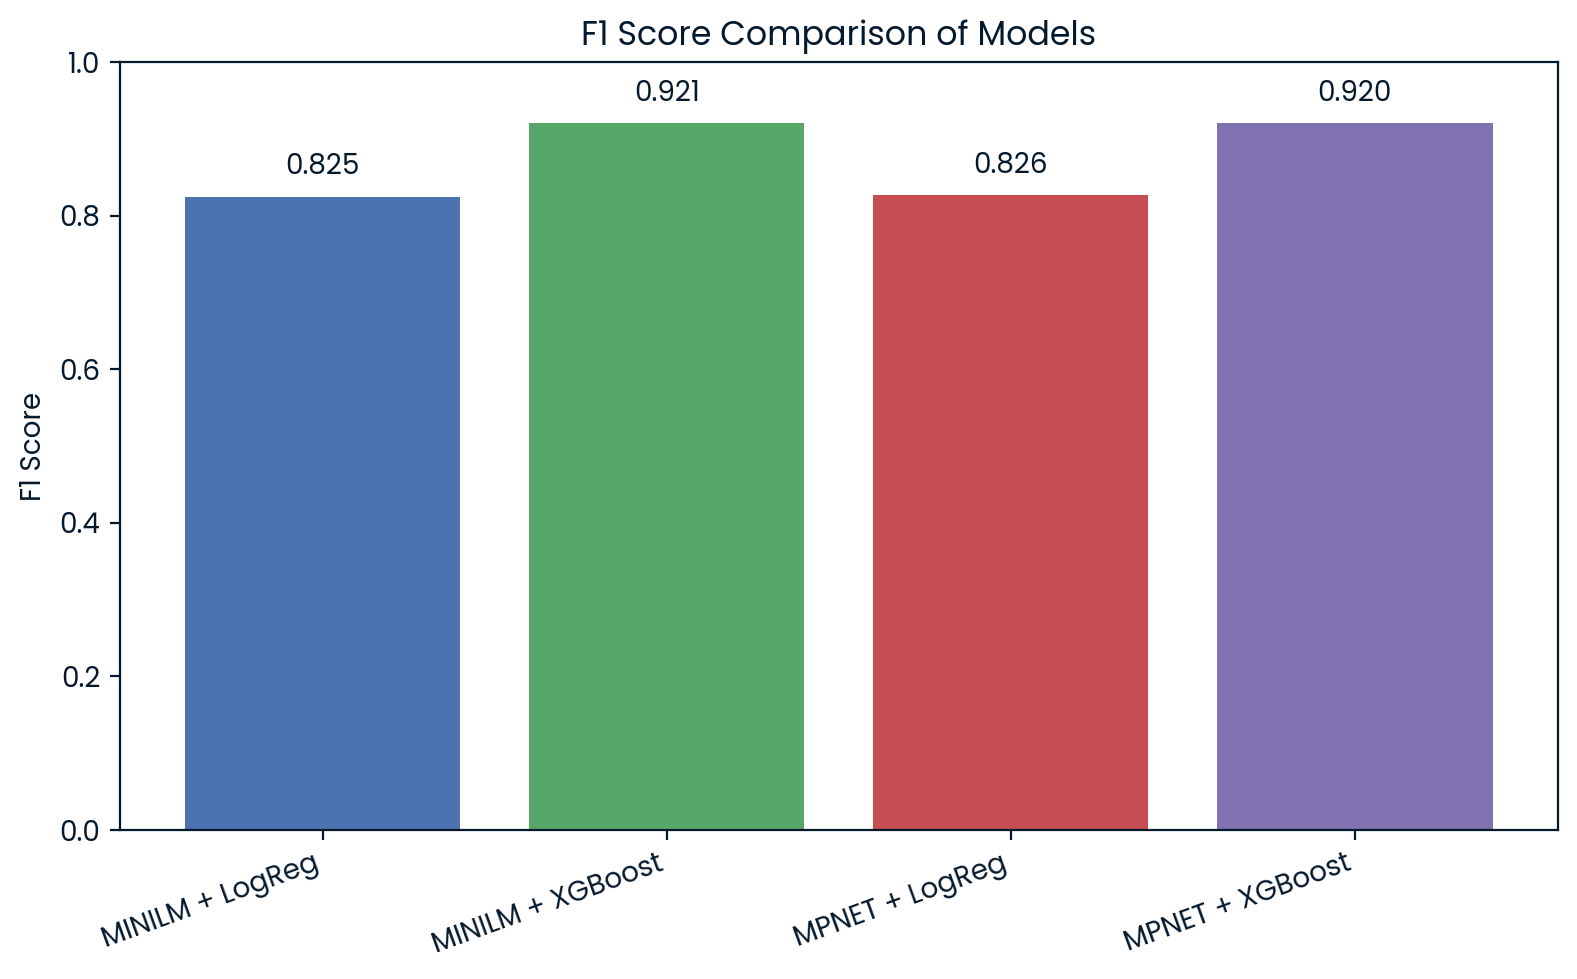

In [27]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "MINILM + LogReg",
    "MINILM + XGBoost",
    "MPNET + LogReg",
    "MPNET + XGBoost"
]

f1_scores = [fs1, fs2, fs3, fs4]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, f1_scores, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison of Models")
plt.ylim(0, 1)
plt.xticks(rotation=20, ha='right')

# Annotate bars with F1 score values
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{score:.3f}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

---
---
---

# **HYPERPARAMETER TUNING ON MINILM+XGBOOST MODEL**

In [26]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

macro_f1 = make_scorer(f1_score, average='macro')

param_grid = {
    "max_depth": [4, 5, 6],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "learning_rate": [0.03, 0.05],
    "n_estimators": [300, 500]
}

base_xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=base_xgb,
    param_distributions=param_grid,
    n_iter=30,                 
    scoring=macro_f1,          
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

class_weights = {
    0: 1.0,
    1: 3.0,
    2: 1.5
}

sample_weights = np.array([class_weights[y] for y in y_train_enc])

random_search.fit(
    X_train_df, 
    y_train_enc, 
    sample_weight=sample_weights)

Fitting 3 folds for each of 30 candidates, totalling 90 fits

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=

,estimator,"XGBClassifier..._class=3, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.03, 0.05], 'max_depth': [4, 5, ...], ...}"
,n_iter,30
,scoring,make_scorer(f...average=macro)
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [27]:
best_xgb = random_search.best_estimator_

cr_tuned, fs_tuned = evaluateModel(
    best_xgb, 
    X_train_df, y_train_enc, 
    X_val_df, y_val_enc
)

              precision    recall  f1-score   support

           0     0.9698    0.9940    0.9817      3487
           1     0.9134    0.6951    0.7894       364
           2     0.9915    0.9915    0.9915       354

    accuracy                         0.9679      4205
   macro avg     0.9582    0.8935    0.9209      4205
weighted avg     0.9667    0.9679    0.9659      4205

0.9208825441488827


---
---
---

# **FUSING MINILM & MPNET ENCODINGS**

In [29]:
train_df = pd.read_pickle('train_with_embeddings.pkl')
train_df.columns

Index(['answer', 'type', 'context', 'question', 'ans_emb_minilm',
       'ctx_emb_minilm', 'q_emb_minilm', 'ans_emb_mpnet', 'ctx_emb_mpnet',
       'q_emb_mpnet'],
      dtype='object')

In [55]:
X_minilm = buildFeatures(train_df, 'minilm')
X_mpnet = buildFeatures(train_df, 'mpnet')

X_fused = pd.concat(
    [X_minilm.add_prefix('minilm_'),
    X_mpnet.add_prefix('mpnet_')],
    axis=1
)

from sklearn.model_selection import train_test_split

label_map = {"factual": 0, "contradiction": 1, "irrelevant": 2}

y = train_df["type"].map(label_map)

X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(
    X_fused,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

xgb_fused = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=3,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42
)

xgb_fused.fit(X_train_f, y_train_f)

val_preds = xgb_fused.predict(X_val_f)

print(classification_report(y_val_f, val_preds, digits=4))
print("Macro F1:", f1_score(y_val_f, val_preds, average="macro"))

              precision    recall  f1-score   support

           0     0.9679    0.9954    0.9815      3487
           1     0.9392    0.6786    0.7879       364
           2     0.9916    0.9972    0.9944       354

    accuracy                         0.9681      4205
   macro avg     0.9662    0.8904    0.9212      4205
weighted avg     0.9674    0.9681    0.9658      4205

Macro F1: 0.9212412827815978


## **Insight from MiniLM & MPNET Fusion**
Fusing MiniLM and MPNet embeddings resulted in only a marginal improvement in macro F1, indicating that both models capture largely overlapping semantic information for this task when reduced to cosine-similarity features. Although MPNet is architecturally stronger and designed to better model paraphrastic relationships, the downstream feature representation compresses both embeddings into a small set of scalar similarity scores, effectively limiting the expressive differences between the two models. This suggests that the performance ceiling is not driven by insufficient semantic representation, but rather by the decision strategy applied to already strong features. The experiment highlights an important trade-off: while embedding diversity can be beneficial, its impact diminishes when semantic richness is aggressively summarized, and further gains likely require changes in decision logic (e.g., thresholding or entailment-aware modeling) rather than additional embedding fusion.

## **Probability Thresholding**
Here, we try to improve our macro f1 score by adjusting the decision thresholds at inference time without retraining. This is because: 
- `argmax` is biased toward the majority class (`factual`)
- `contradiction` errors tend to have moderate probability
- lowering the contradiction threshold recovers recall with minimal precision loss

In [32]:
probs_val = xgb_fused.predict_proba(X_val)

def thresholdPredict(probs, t_contra=0.4, t_irrel=0.5):
    preds = []
    for p in probs:
        if p[1] >= t_contra:
            preds.append(1)
        elif p[2] >= t_irrel:
            preds.append(2)
        else:
            preds.append(0)
    return np.array(preds)

best_score = 0
best_thresh = None

for t_contra in np.arange(0.25, 0.55, 0.05):
    for t_irrel in np.arange(0.40, 0.70, 0.05):
        preds = thresholdPredict(
            probs_val,
            t_contra=t_contra,
            t_irrel=t_irrel
        )
        score = f1_score(y_val, preds, average="macro")
        
        if score > best_score:
            best_score = score
            best_thresh = (t_contra, t_irrel)

print('Best F1 Score:', best_score)
print('Thresholds:', best_thresh)

Best F1 Score: 0.9221793426872184
Thresholds: (np.float64(0.49999999999999994), np.float64(0.6499999999999999))


In [34]:
t_contra_best, t_irrel_best = best_thresh

final_preds = thresholdPredict(
    probs_val,
    t_contra=t_contra_best,
    t_irrel=t_irrel_best
)

print(classification_report(y_val, final_preds, digits=4))
print("Macro F1:", f1_score(y_val, final_preds, average="macro"))

              precision    recall  f1-score   support

           0     0.9677    0.9957    0.9815      3487
           1     0.9392    0.6786    0.7879       364
           2     0.9972    0.9972    0.9972       354

    accuracy                         0.9684      4205
   macro avg     0.9680    0.8905    0.9222      4205
weighted avg     0.9677    0.9684    0.9660      4205

Macro F1: 0.9221793426872184


## **Insight from Thresholding**
Despite extensive experimentation with model architecture, feature fusion, hyperparameter optimization, and decision threshold tuning, performance gains plateaued around a macro F1 of 0.92. This indicates that the remaining classification errors are driven by inherently ambiguous cases where semantic overlap between factual and contradictory answers is subtle and context-dependent. Under the constraint of fixed, similarity-based semantic features and non-neural classifiers, further improvements would likely require entailment-aware models or cross-encoder architectures rather than additional feature or decision-level optimization.

---
---
---

# **FEATURE IMPORTANCE**

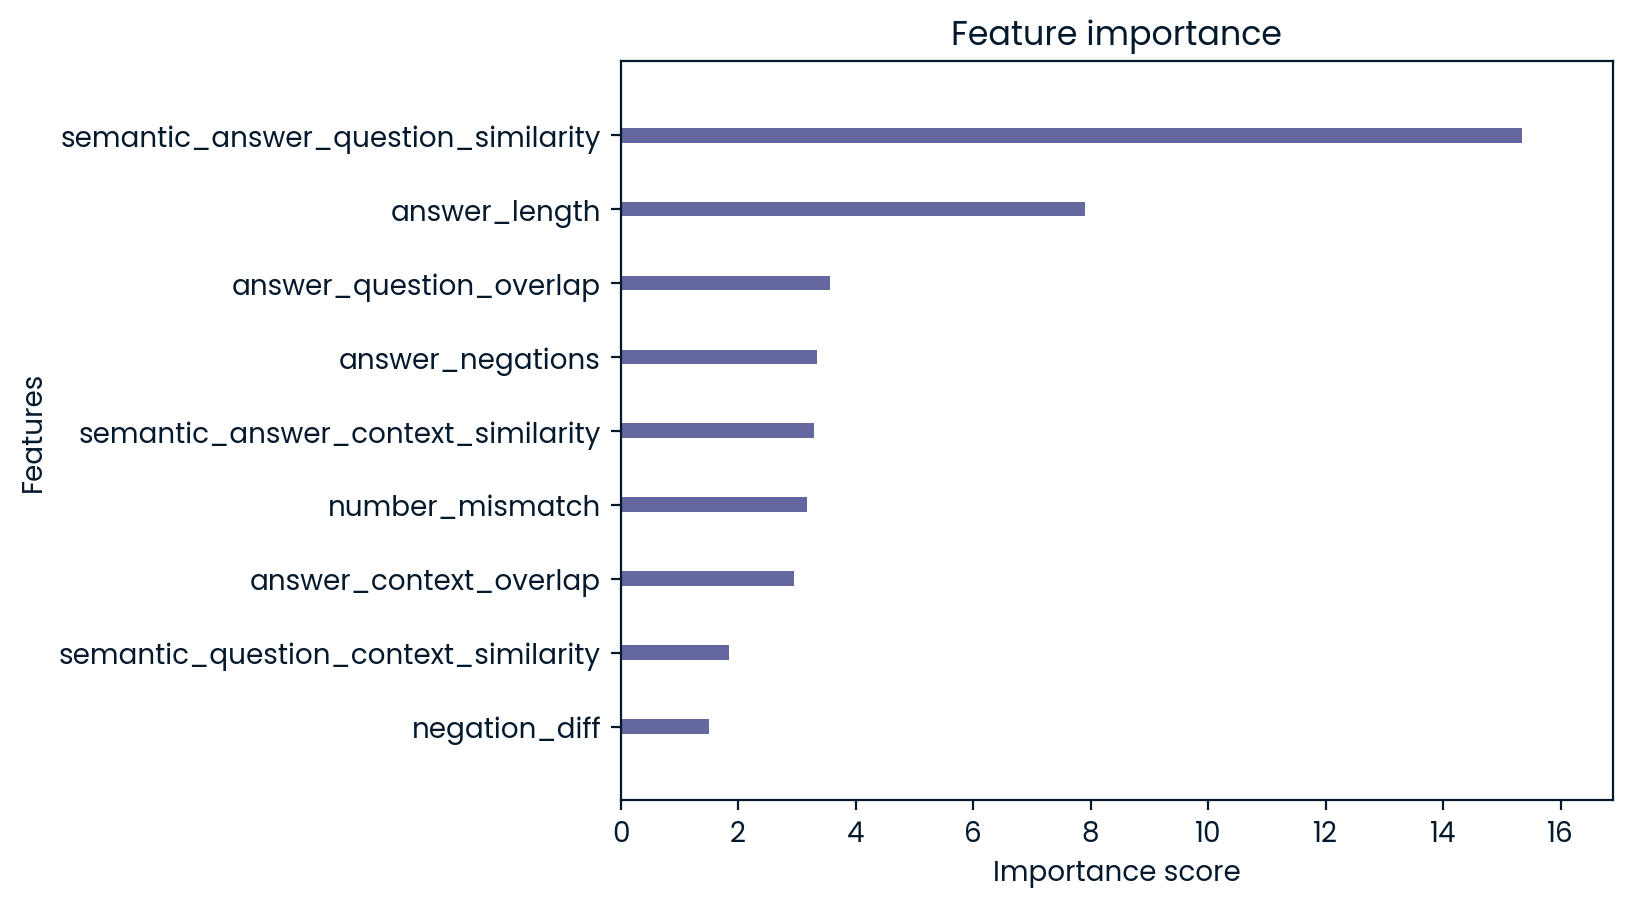

In [35]:
from xgboost import plot_importance

xgb_fused.get_booster().feature_names = FEATURE_NAMES

ax = plot_importance(
    xgb,
    importance_type="gain",
    max_num_features=9,
    show_values=False
)
plt.grid(False)
plt.show()

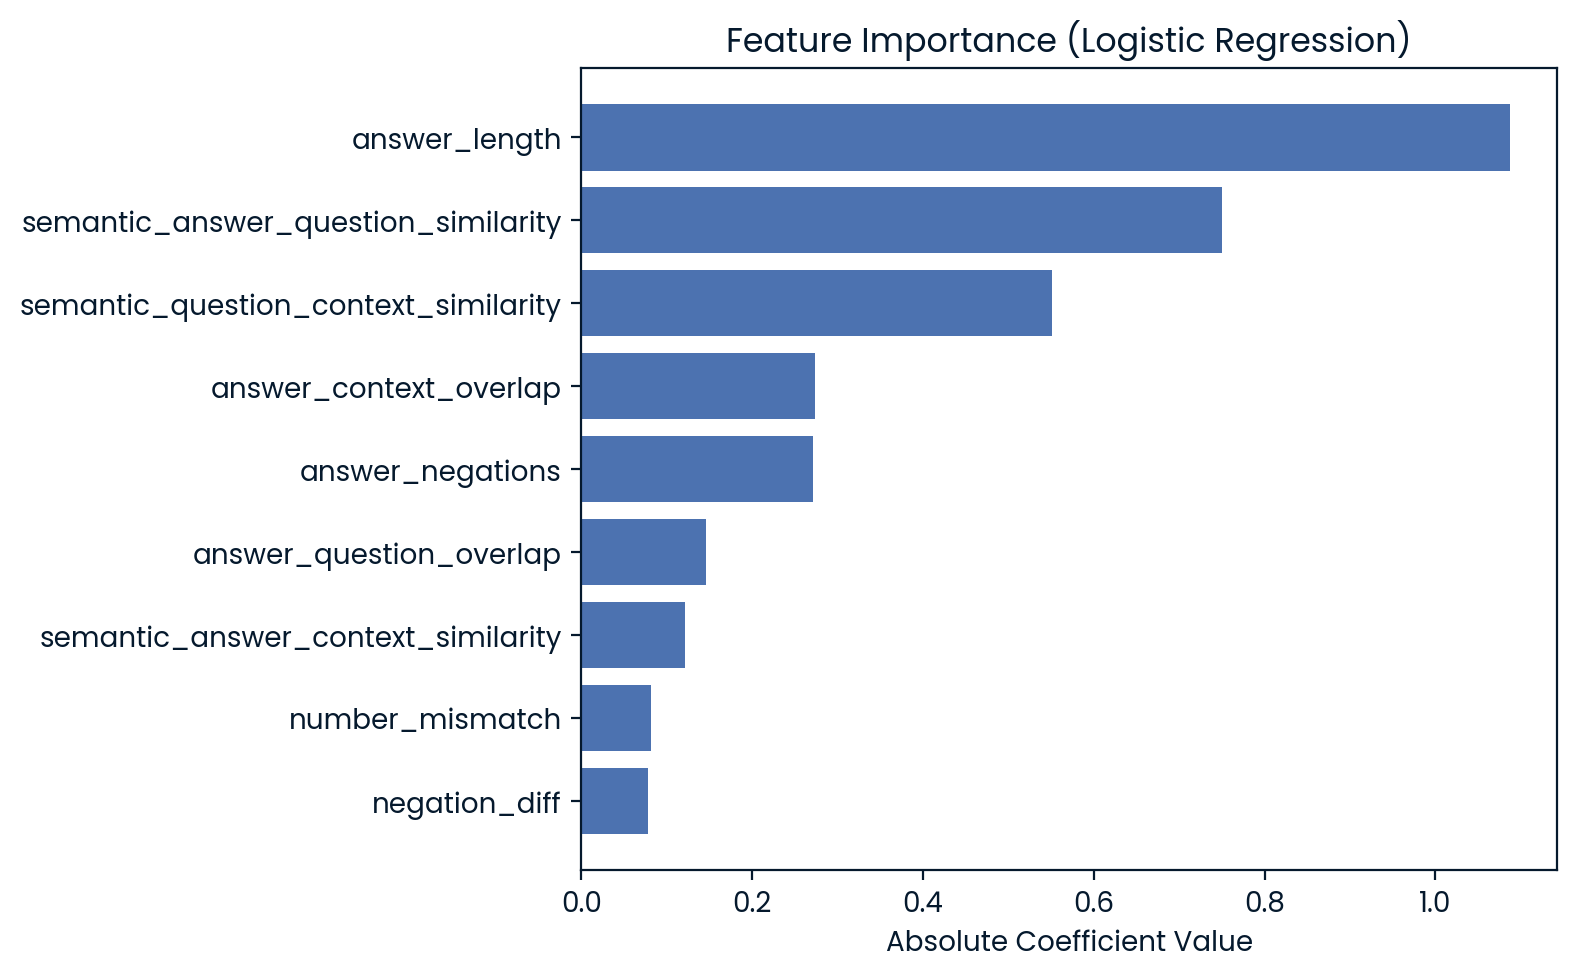

In [43]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X_train_mp_scaled.columns

# Get absolute value of coefficients for importance
importances = np.abs(lr.coef_[0])

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(8, 5))
bars = plt.barh(sorted_features, sorted_importances, color='#4C72B0')
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()  # Highest importance at the top

plt.tight_layout()
plt.show()

## **Insights from Feature Importance Plots**
Feature importance analysis shows that semantic similarity features dominate model performance, with answer–question semantic similarity emerging as the strongest predictor across models. XGBoost leverages these semantic signals more effectively than Logistic Regression by capturing non-linear interactions, leading to substantially higher macro F1 scores. Lexical features such as negation and number mismatch provide complementary but secondary value, reinforcing semantic embeddings rather than driving predictions on their own.

---
---
---

# **ERROR ANALYSIS**

In [63]:
if list(X_val_df.columns) == list(X_train_df.columns):
    print('y')

y


In [71]:
val_probs = xgb.predict_proba(X_val_df)
val_preds = thresholdPredict(
    val_probs,
    t_contra=t_contra_best,
    t_irrel=t_irrel_best
)

val_results = X_val_df.copy()
val_results["true"] = y_val_enc
val_results["pred"] = val_preds

In [72]:
val_results['true_label'] = val_results['true'].map(INV_LABEL_MAP)
val_results['pred_label'] = val_results['pred'].map(INV_LABEL_MAP)

## **Normalized Error Confusion Matrix**

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    val_results["true"],
    val_results["pred"],
    normalize="true"
)

cm_df = pd.DataFrame(
    cm,
    index=["factual", "contradiction", "irrelevant"],
    columns=["factual", "contradiction", "irrelevant"]
)

cm_df

,factual,contradiction,irrelevant
factual,0.994264,0.005736,0.000000
contradiction,0.302198,0.692308,0.005495
irrelevant,0.000000,0.008475,0.991525


## **Error Breakdown by Class Pair**

In [74]:
errors = val_results[val_results["true"] != val_results["pred"]]

errors.groupby([
    "true_label",
    "pred_label"
    ]).size().sort_values(ascending=False)

true_label     pred_label   
contradiction  factual          110
factual        contradiction     20
irrelevant     contradiction      3
contradiction  irrelevant         2
dtype: int64

## **Hardest Errors (Low Confidence, High Ambiguity)**

In [79]:
errors["conf_contradiction"] = val_probs[errors.index, 1]
errors["conf_factual"] = val_probs[errors.index, 0]

errors.sort_values("conf_contradiction", ascending=False).head(10)[
    ["true_label", "pred_label", "conf_contradiction"]
]

,true_label,pred_label,conf_contradiction
61,factual,contradiction,0.999568
2495,factual,contradiction,0.999553
1102,irrelevant,contradiction,0.995840
3160,factual,contradiction,0.992177
3424,factual,contradiction,0.979099
1485,factual,contradiction,0.959271
2734,irrelevant,contradiction,0.932829
180,factual,contradiction,0.889046
2084,factual,contradiction,0.878854
2529,factual,contradiction,0.865870


## **Qualitative Inspection**

In [83]:
cols = ['question', 'context', 'answer', 
        'true_label', 'pred_label']

merged = pd.DataFrame({
    'question': train_df.loc[errors.index, 'question'].values,
    'context': train_df.loc[errors.index, 'context'].values,
    'answer': train_df.loc[errors.index, 'answer'].values,
    'true_label': errors['true_label'].values,
    'pred_label': errors['pred_label'].values
})

In [107]:
sample = merged.sample(1).reset_index(drop=True)

print("--- Sample Row ---")
print('Question:', sample.at[0, 'question'])
print('---')
print('Context:', sample.at[0, 'context'])
print('---')
print('Answer:', sample.at[0, 'answer'])
print('---')
print(f"True Label: {sample.at[0, 'true_label']} vs Predicted Label: {sample.at[0, 'pred_label']}")

--- Sample Row ---
Question: What was the dominant religion of Persia before Islam?
---
Context: Religious beliefs in the Eastern Empire and Persia were in flux during the late 6th and early 7th centuries. Judaism was an active proselytising faith, and at least one Arab political leader converted to it.[J] Christianity had active missions competing with the Persians' Zoroastrianism in seeking converts, especially among residents of the Arabian Peninsula. All these strands came together with the emergence of Islam in Arabia during the lifetime of Muhammad (d. 632). After his death, Islamic forces conquered much of the Eastern Empire and Persia, starting with Syria in 634–635 and reaching Egypt in 640–641, Persia between 637 and 642, North Africa in the later 7th century, and the Iberian Peninsula in 711. By 714, Islamic forces controlled much of the peninsula in a region they called Al-Andalus.
---
Answer: Before the rise of Islam, the predominant religion in Persia was Zoroastrianism.


---
---
---

# **FINAL TRAINING & TESTING**
Despite MPNet being a stronger embedding model in isolation, MiniLM + XGBoost achieved the best balance of:

- Macro-averaged performance (0.92)
- Computational efficiency
- Training stability
- Simplicity of deployment

This model was therefore selected for final training on the full dataset and for generating predictions on the test set.

In [21]:
train_df = pd.read_pickle('train_with_embeddings.pkl')
test_df = pd.read_json('data/test.json')

## **Build Embeddings for the Test Set**

In [50]:
# model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# test_df["ans_emb_minilm"] = list(model.encode(test_df["answer"].tolist()))
# test_df["ctx_emb_minilm"] = list(model.encode(test_df["context"].tolist()))
# test_df["q_emb_minilm"]   = list(model.encode(test_df["question"].tolist()))

# test_df.to_pickle("test_df_with_embeddings.pkl")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [52]:
test_df = pd.read_pickle('test_df_with_embeddings.pkl')

In [48]:
X = buildFeatures(train_df, 'minilm')

In [49]:
label_map = {
    "factual": 0,
    "contradiction": 1,
    "irrelevant": 2
}
inv_label_map = {v: k for k, v in label_map.items()}

y = train_df["type"].map(label_map)

In [53]:
xgb.fit(X, y)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


## **Predict on Test**

In [54]:
X_test = buildFeatures(test_df, 'minilm')

In [55]:
test_preds = xgb.predict(X_test)
test_df['type'] = [inv_label_map[p] for p in test_preds]

test_df['type'].value_counts()

type
factual          1731
irrelevant        188
contradiction      81
Name: count, dtype: int64

In [59]:
final_test_df = test_df[['ID', 'answer', 'type', 'context', 'question']]
final_test_df.head()

,ID,answer,type,context,question
0,1,"In the mid-19th century, the Bronx was referre...",factual,The Bronx street grid is irregular. Like the n...,What was the Bronx called in the mid-19th cent...
1,2,"Beyoncé's father, Mathew Knowles, began managi...",factual,,When did Beyoncé begin to manage the girl group?
2,3,Dionysus was similar to the Roman god Bacchus.,factual,"While the new plebeian nobility made social, p...",To what Roman god was Dionysus similar?
3,4,The most crucial defense in preventing the spr...,factual,"Techniques like hand washing, wearing gowns, a...",What is the most important defense against the...
4,5,The third largest long term acute care provide...,factual,The Baylor College of Medicine has annually be...,What is the third largest acute care center in...


In [60]:
final_test_df.to_json(
    'test_predictions.json',
    orient='records',
    indent=2
)

---
---
---

# **GENERATIVE AI (LLMs)**
Despite strong overall performance from embedding-based classifiers, prior experiments revealed persistent limitations, particularly in handling semantically subtle contradictions, context-dependent factuality, and cases requiring multi-step reasoning. Even with richer sentence embeddings, model fusion, and threshold calibration, improvements in macro F1 began to plateau, indicating diminishing returns from purely discriminative, feature-driven approaches. As a result, this work explores large generative language models—Gemini Flash, Mistral, and Seed-Flash—as an alternative paradigm. These models are capable of jointly reasoning over the question, context, and answer in natural language, enabling explicit semantic comparison and logical inference. This approach is essential for addressing edge cases where embedding similarity alone is insufficient, and where interpretive reasoning may better capture nuanced inconsistencies or implicit contradictions.

In [ ]:
import json
import time
import requests
import pandas as pd
import numpy as np
from collections import Counter
import os
from datetime import datetime

## **Defaults**

In [ ]:
API_KEY = os.environ['API_KEY']
API_URL = "https://openrouter.ai/api/v1/chat/completions"

MODELS = {
    "gemini_flash": "google/gemini-2.5-flash-preview-09-2025",
    "mistral": "mistralai/ministral-8b",
    "seed_flash": "bytedance-seed/seed-1.6-flash"
}

In [6]:
with open('promptTemplate.txt', 'r', encoding='utf-8') as f:
    PROMPT_TEMPLATE = f.read()

## **API Calls**

In [ ]:
def call_model(model_id, question, context, answer, max_retries=3):
    """Call model API with retry logic"""
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    
    prompt = PROMPT_TEMPLATE.format(
        question=question,
        context=context if context else "(empty)",
        answer=answer
    )
    
    payload = {
        "model": model_id,
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.0,
        "max_tokens": 20
    }
    
    for attempt in range(max_retries):
        try:
            response = requests.post(API_URL, headers=headers, json=payload, timeout=60)
            response.raise_for_status()
            result = response.json()
            
            if 'choices' in result and len(result['choices']) > 0:
                text = result['choices'][0]['message']['content'].strip().lower()
                
                if 'factual' in text:
                    return 'factual'
                elif 'contradiction' in text:
                    return 'contradiction'
                elif 'irrelevant' in text:
                    return 'irrelevant'
                else:
                    print(f"Warning: Unexpected response: {text}")
                    return None
            else:
                print(f"Warning: No choices in response")
                return None
                
        except Exception as e:
            print(f"Error on attempt {attempt + 1}/{max_retries}: {str(e)}")
            if attempt < max_retries - 1:
                time.sleep(2 ** attempt)
            else:
                return None
    
    return None

## **Ensembling Logic**

In [ ]:
def majority_vote(predictions):
    """Get majority vote from predictions"""
    valid_preds = [p for p in predictions if p is not None]
    
    if len(valid_preds) == 0:
        return 'factual'
    elif len(valid_preds) == 1:
        return valid_preds[0]
    else:
        counter = Counter(valid_preds)
        most_common = counter.most_common(2)
        
        if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
            return valid_preds[0]
        
        return most_common[0][0]

## **Execution Script**

In [ ]:
def main():
    start_time = datetime.now()
    
    print("TEST SET PREDICTION - FULL RUN")
    print(f"Start time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
    
    # Load test data
    print("Loading test.json...")
    with open('test.json', 'r') as f:
        test_data = json.load(f)
    
    print(f"Test data loaded: {len(test_data)} examples\n")
    
    # Run predictions
    print("RUNNING PREDICTIONS ON ALL TEST EXAMPLES")
    
    model_names = list(MODELS.keys())
    predictions_dict = {model_name: [] for model_name in model_names}
    predictions_dict['ensemble'] = []
    
    total = len(test_data)
    failed_calls = {model_name: 0 for model_name in model_names}
    
    for idx, row in enumerate(test_data):
        if (idx + 1) % 50 == 0:
            elapsed = datetime.now() - start_time
            avg_time_per_example = elapsed.total_seconds() / (idx + 1)
            remaining_examples = total - (idx + 1)
            eta_seconds = avg_time_per_example * remaining_examples
            eta = datetime.now() + pd.Timedelta(seconds=eta_seconds)
            
            print(f"Progress: [{idx + 1}/{total}] ({(idx + 1)/total*100:.1f}%) - ETA: {eta.strftime('%H:%M:%S')}")
        
        question = row['question']
        context = row['context']
        answer = row['answer']
        
        # Get predictions from each model
        model_preds = []
        for model_name, model_id in MODELS.items():
            pred = call_model(model_id, question, context, answer)
            
            if pred is None:
                failed_calls[model_name] += 1
                pred = 'factual'  # Default fallback
            
            predictions_dict[model_name].append(pred)
            model_preds.append(pred)
            
            time.sleep(0.3)
        
        # Ensemble prediction
        ensemble_pred = majority_vote(model_preds)
        predictions_dict['ensemble'].append(ensemble_pred)
    
    print(f"\nCompleted all predictions!")
    
    # Print statistics
    print("PREDICTION STATISTICS")
    
    for model_name in model_names + ['ensemble']:
        preds = predictions_dict[model_name]
        counter = Counter(preds)
        
        print(f"{model_name.upper().replace('_', ' ')}:")
        print(f"  Factual:        {counter['factual']:4d} ({counter['factual']/len(preds)*100:5.1f}%)")
        print(f"  Contradiction:  {counter['contradiction']:4d} ({counter['contradiction']/len(preds)*100:5.1f}%)")
        print(f"  Irrelevant:     {counter['irrelevant']:4d} ({counter['irrelevant']/len(preds)*100:5.1f}%)")
        
        if model_name in failed_calls and failed_calls[model_name] > 0:
            print(f"  Failed calls:   {failed_calls[model_name]:4d}")
        
        print()
    
    # Save predictions
    print("SAVING PREDICTIONS")
    
    for model_name in model_names + ['ensemble']:
        # Create output in required format
        output_data = []
        for idx, row in enumerate(test_data):
            output_row = {
                "ID": row['ID'],
                "answer": row['answer'],
                "type": predictions_dict[model_name][idx],
                "context": row['context'],
                "question": row['question']
            }
            output_data.append(output_row)
        
        # Save to file
        filename = f'test_predictions_{model_name}.json'
        with open(filename, 'w') as f:
            json.dump(output_data, f, indent=2)
        print(f"Saved {filename}")
    
    # Calculate agreement between models
    print("MODEL AGREEMENT ANALYSIS")
    
    # Count how many times all models agree
    all_agree = 0
    two_agree = 0
    all_different = 0
    
    for idx in range(len(test_data)):
        preds = [predictions_dict[m][idx] for m in model_names]
        unique_preds = set(preds)
        
        if len(unique_preds) == 1:
            all_agree += 1
        elif len(unique_preds) == 2:
            two_agree += 1
        else:
            all_different += 1
    
    print(f"All 3 models agree:     {all_agree:4d} ({all_agree/total*100:5.1f}%)")
    print(f"2 models agree:         {two_agree:4d} ({two_agree/total*100:5.1f}%)")
    print(f"All models disagree:    {all_different:4d} ({all_different/total*100:5.1f}%)")
    
    # Final summary
    end_time = datetime.now()
    duration = end_time - start_time
    
    print("PREDICTION COMPLETE")
    print(f"End time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Duration: {duration}")
    print(f"Average time per example: {duration.total_seconds()/total:.2f} seconds")
    
    print("OUTPUT FILES CREATED")
    
    output_files = [
        ('test_predictions_gemini_flash.json', 'Gemini Flash predictions'),
        ('test_predictions_mistral.json', 'Mistral predictions'),
        ('test_predictions_seed_flash.json', 'Seed Flash predictions'),
        ('test_predictions_ensemble.json', 'Ensemble predictions')
    ]
    
    for filename, description in output_files:
        if os.path.exists(filename):
            size = os.path.getsize(filename)
            print(f"  ✓ {filename:45s} - {description} ({size:,} bytes)")
        else:
            print(f"  ✗ {filename:45s} - NOT CREATED")

In [ ]:
if __name__ == "__main__":
    main()

## **Performance Insights**
The ensemble of generative models achieved a macro-F1 score of _**0.9667**_, representing a substantial improvement over all prior discriminative and embedding-based approaches. This gain highlights the ensemble’s ability to capture nuanced semantic relationships and perform implicit reasoning across the question, context, and answer, particularly for minority and ambiguous classes. By aggregating complementary reasoning patterns from multiple large language models, the ensemble reduced class-specific errors and improved robustness, overcoming the performance plateau observed in earlier models.

---
---
---

# **CONCLUSION & FUTURE WORK**
In this work, we explored a range of modeling approaches for factuality classification, beginning with traditional embedding-based classifiers and progressively moving toward more advanced techniques. While MiniLM and MPNet combined with XGBoost provided strong and efficient baselines, their performance plateaued due to limited capacity to capture deeper semantic reasoning and subtle contradictions. Transitioning to a generative AI ensemble significantly improved results, achieving a macro-F1 score of 0.9667 and demonstrating superior understanding of contextual and semantic relationships.

Future work will focus on improving efficiency and scalability by exploring model distillation, prompt optimization, and hybrid systems that combine generative reasoning with lightweight classifiers. Additional error analysis and robustness testing on edge cases will also help further strengthen model reliability in real-world applications.